<a href="https://colab.research.google.com/github/brenorupf/projeto-insights/blob/main/Projeto_de_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

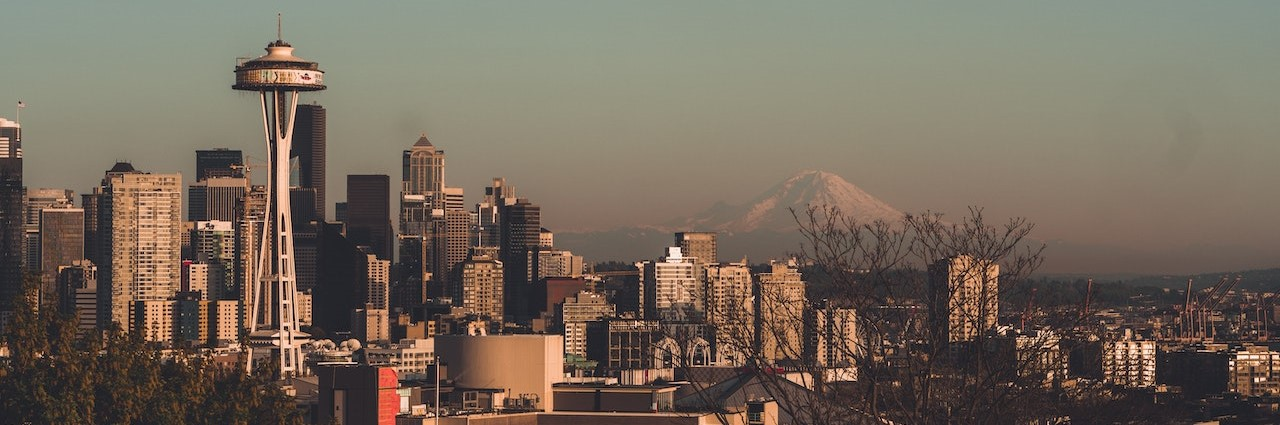

Seattle - Estados Unidos

#Sobre o Projeto

Este trabalho é um desafio retirado de um post (https://tinyurl.com/2pjwtvdu) do blog ‘Seja Um Data Scientist’. O objetivo do Projeto de Insights é recomendar soluções para o negócio através de insights gerados apenas por uma Análise Exploratória de Dados, **sem uso de algoritmos de Machine Learning**. O intuito é mostrar que muitos dos problemas de uma empresa podem ser resolvidos com uma análise exploratória bem feita. 

Na publicação, o autor **cria uma empresa imaginária** para simular um contexto real de um problema de negócio.

#Contexto do Desafio

O autor do post descreve o seguinte contexto fictício:

“A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contratado pela empresa para ajudar a encontrar as melhores oportunidades no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente a preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é **responder as seguinte perguntas:**

1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?”

#Os Dados do Desafio

Os dados foram retirados do Kaggle (https://tinyurl.com/2p8kw6du) e se referem a imóveis vendidos em King County (Estados Unidos) entre Maio de 2014 e Maio de 2015.

Conforme informações do Wikipedia, o Condado de King fica no estado de Washington e possui mais de 2,2 milhões de habitantes. A sede e cidade mais populosa do condado é Seattle. 

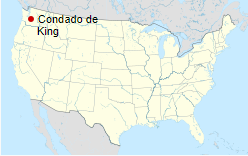

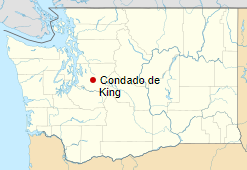

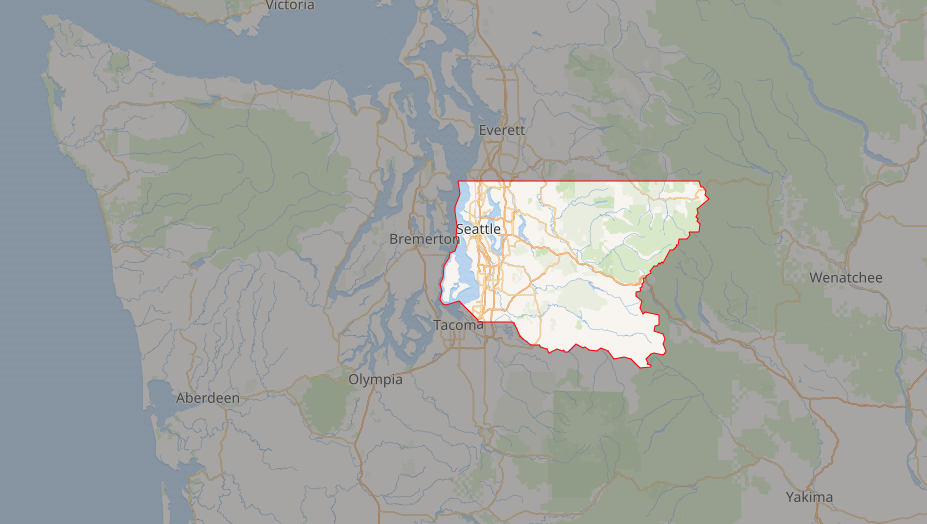

#Descrição das Colunas

As informações abaixo foram retiradas do grupo de discussões deste dataset no Kaggle e foram verificadas neste link: https://tinyurl.com/mk22k7bj.

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower and 75 or ¾ bath is a bathroom that contains one sink, one toilet and a shower or a bath. Traditionally, a full bath contains at least one sink, one toilet, a shower and a bath, so a . 75 bathroom only has either a shower or a bath
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was (0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent)
* condition - An index from 1 to 5 on the condition of the apartment (1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good)
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#Importação dos pacotes e dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Python Pessoal/Revisão Tera e Portfólio/Portfólio/Projeto Insights/kc_house_data.csv')

#Análise Exploratória

In [ ]:
#Checar os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Configurar para exibir 25 colunas ao abrir o dataframe
pd.set_option("display.max_columns", 25)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe(percentiles = [.25, .5, .75, .90, .95, .99]).round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
90%,8.732028e+09,887000.00,4.00,3.00,3250.00,21397.60,2.00,0.00,0.00,4.00,9.00,2950.00,970.00,2007.00,0.00,98155.00,47.73,-122.02,2930.00,17852.40
95%,9.297300e+09,1156480.00,5.00,3.50,3760.00,43339.20,2.00,0.00,2.00,5.00,10.00,3400.00,1190.00,2011.00,0.00,98177.00,47.75,-121.98,3300.00,37062.80
99%,9.558728e+09,1964400.00,6.00,4.25,4978.80,213008.00,3.00,0.00,4.00,5.00,11.00,4370.00,1660.00,2014.00,2008.00,98199.00,47.77,-121.78,4080.00,157687.00


##Criação das colunas Ano, Mês e Dia

Um pouco mais adiante será necessário fazer análises de acordo com o período (dia, mês e ano) que a venda ocorreu. Portanto, achei válido inserir desde já estas variáveis no dataframe. 

In [ ]:
ano = []
mes = []
dia = []

for i in df.date:
  ano.append(i[0:4])
  mes.append(i[4:6])
  dia.append(i[6:8])

df['year_of_sale'] = pd.DataFrame(ano)
df['month_of_sale'] = pd.DataFrame(mes)
df['day_of_sale'] = pd.DataFrame(dia)

df[['date', 'year_of_sale', 'month_of_sale', 'day_of_sale']].tail(10)

,date,year_of_sale,month_of_sale,day_of_sale
21603,20140825T000000,2014,08,25
21604,20150126T000000,2015,01,26
21605,20141014T000000,2014,10,14
21606,20150326T000000,2015,03,26
21607,20150219T000000,2015,02,19
21608,20140521T000000,2014,05,21
21609,20150223T000000,2015,02,23
21610,20140623T000000,2014,06,23
21611,20150116T000000,2015,01,16
21612,20141015T000000,2014,10,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

##Checar outliers da variável target

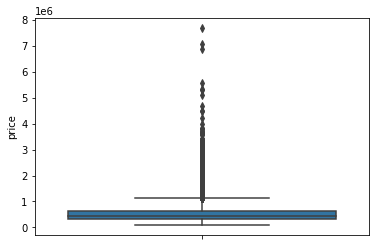

In [ ]:
sns.boxplot(y="price", data=df)

In [ ]:
#Relembrando: IQR = Amplitude Interquartílica (Q3 - Q1)

#Função para calcular outliers
def limite_interquartil(df, variavel, distancia):

    IQR = df[variavel].quantile(0.75) - df[variavel].quantile(0.25)

    limite_inferior = df[variavel].quantile(0.25) - (IQR * distancia)
    limite_superior = df[variavel].quantile(0.75) + (IQR * distancia)

    return limite_superior,  limite_inferior

In [ ]:
limite_interquartil(df, 'price', 1.5)

(1129575.0, -162625.0)

O gráfico boxplot mostra que há uma considerável quantidade de outliers na variável preço. Através da função acima, é possível pegar os valores exatos dos limites superior e inferior. 

Sendo assim, vou criar um novo dataframe somente com imóveis que possuem preço até o valor do limite superior ($1.129.575,00).

In [ ]:
df2 = df.query('price < 1129575')   

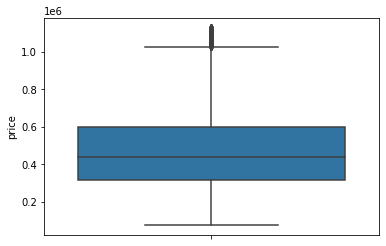

In [ ]:
sns.boxplot(y="price", data=df2)

In [ ]:
df2.describe(percentiles = [.25, .5, .75, .90, .95, .99]).round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00
mean,4.603223e+09,476984.56,3.33,2.05,1975.56,14610.41,1.48,0.00,0.17,3.41,7.53,1708.33,267.23,1970.81,74.68,98078.56,47.56,-122.21,1922.26,12447.08
std,2.877364e+09,208371.26,0.91,0.71,774.83,40109.56,0.54,0.05,0.64,0.65,1.04,727.30,409.03,29.16,378.76,53.34,0.14,0.14,614.93,26538.59
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.131701e+09,315000.00,3.00,1.50,1400.00,5000.00,1.00,0.00,0.00,3.00,7.00,1170.00,0.00,1951.00,0.00,98033.00,47.46,-122.33,1470.00,5046.00
50%,3.905082e+09,437500.00,3.00,2.00,1860.00,7500.00,1.00,0.00,0.00,3.00,7.00,1520.00,0.00,1974.00,0.00,98065.00,47.57,-122.23,1800.00,7542.00
75%,7.338101e+09,600000.00,4.00,2.50,2431.00,10319.00,2.00,0.00,0.00,4.00,8.00,2100.00,510.00,1996.00,0.00,98118.00,47.68,-122.12,2280.00,9883.50
90%,8.732000e+09,780000.00,4.00,2.75,3040.00,20000.00,2.00,0.00,0.00,4.00,9.00,2770.00,910.00,2007.00,0.00,98155.00,47.73,-122.02,2780.00,16195.80
95%,9.297300e+09,885000.00,5.00,3.25,3410.00,42194.00,2.00,0.00,2.00,5.00,9.00,3177.60,1100.00,2010.00,0.00,98177.00,47.75,-121.98,3100.00,36677.00
99%,9.558044e+09,1050000.00,6.00,3.75,4160.00,210219.02,3.00,0.00,3.00,5.00,10.00,3880.00,1500.00,2014.00,2007.00,98199.00,47.77,-121.78,3720.00,155953.38


##Checando o 'Max' de algumas variáveis

Ao checar as estatísticas descritivas, alguns valores máximos chamam a atenção. Irei conferir se são dados plausíveis ou não. 

In [ ]:
#Conferir o 'Max' da variável 'sqft_living'
sqft_living_max = (df2['sqft_living']==7480)
sqftLivingMax = df2[sqft_living_max]
sqftLivingMax

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,2014,10,07


In [ ]:
bedrooms_max = (df2['bedrooms']==33)
bedMax = df2[bedrooms_max]
bedMax

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,06,25


Me parece ser extremamente improvável que uma casa com 33 quartos, tenha menos de dois banheiros, somente um andar e 1.620 de metragem quadrada do espaço interior (‘sqft_living’). Tudo leva a crer que 33 quartos foi um erro de digitação. Sendo assim, irei corrigir e colocar 3 quartos.

In [ ]:
#Checando quantas vezes aparece cada quantidade de quartos.
df2.bedrooms.value_counts(sort=False)

3     9597
2     2736
4     6308
5     1339
1      198
6      230
0       12
7       30
8        9
9        4
11       1
10       2
33       1
Name: bedrooms, dtype: int64

In [ ]:
df2['bedrooms'].replace({33: 3}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2.describe(percentiles = [.25, .5, .75, .90, .95, .99]).round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00,20467.00
mean,4.603223e+09,476984.56,3.33,2.05,1975.56,14610.41,1.48,0.00,0.17,3.41,7.53,1708.33,267.23,1970.81,74.68,98078.56,47.56,-122.21,1922.26,12447.08
std,2.877364e+09,208371.26,0.89,0.71,774.83,40109.56,0.54,0.05,0.64,0.65,1.04,727.30,409.03,29.16,378.76,53.34,0.14,0.14,614.93,26538.59
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.131701e+09,315000.00,3.00,1.50,1400.00,5000.00,1.00,0.00,0.00,3.00,7.00,1170.00,0.00,1951.00,0.00,98033.00,47.46,-122.33,1470.00,5046.00
50%,3.905082e+09,437500.00,3.00,2.00,1860.00,7500.00,1.00,0.00,0.00,3.00,7.00,1520.00,0.00,1974.00,0.00,98065.00,47.57,-122.23,1800.00,7542.00
75%,7.338101e+09,600000.00,4.00,2.50,2431.00,10319.00,2.00,0.00,0.00,4.00,8.00,2100.00,510.00,1996.00,0.00,98118.00,47.68,-122.12,2280.00,9883.50
90%,8.732000e+09,780000.00,4.00,2.75,3040.00,20000.00,2.00,0.00,0.00,4.00,9.00,2770.00,910.00,2007.00,0.00,98155.00,47.73,-122.02,2780.00,16195.80
95%,9.297300e+09,885000.00,5.00,3.25,3410.00,42194.00,2.00,0.00,2.00,5.00,9.00,3177.60,1100.00,2010.00,0.00,98177.00,47.75,-121.98,3100.00,36677.00
99%,9.558044e+09,1050000.00,6.00,3.75,4160.00,210219.02,3.00,0.00,3.00,5.00,10.00,3880.00,1500.00,2014.00,2007.00,98199.00,47.77,-121.78,3720.00,155953.38


In [ ]:
bedrooms_max = (df2['bedrooms']==11)
bedMax = df2[bedrooms_max]
bedMax

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale
8757,1773100755,20140821T000000,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960,2014,08,21


In [ ]:
bathrooms_max = (df2['bathrooms']==7.5)
bathMax = df2[bathrooms_max]
bathMax

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale
8546,424049043,20140811T000000,450000.0,9,7.5,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,2014,08,11


Todos os outros dados conferidos parecem ser plausíveis, já que o número de banheiros, quartos ou metragem quadrada do espaço interior batem em proporção com as outras informações dos imóveis. 

##Agrupando a variável 'grade'

A variável ‘Grade’ apresenta a seguinte descrição: “Um índice de 1 a 13, onde 1-3 fica aquém da construção e projeto do edifício, 7 tem um nível médio de construção e projeto e 11-13 tem um nível de alta qualidade de construção e projeto”. Ou seja, existem três grupos.

Sendo assim, ao invés de deixar a variável com uma numeração de 1 a 13, decidi criar 3 agrupamentos:

- 1 (1 a 3 - aquém da construção e projeto do edifício);
- 2 (4 a 10 - nível médio de construção e projeto);
- 3 (11 a 13 - nível de alta qualidade de construção e projeto)

In [ ]:
condicoes = [  
  (df2['grade'] >= 1) & (df2['grade'] <= 3),
  (df2['grade'] >= 4) & (df2['grade'] <= 10),
  (df2['grade'] >= 11)
    ]
valores = [1, 2, 3]

df2["grade"] = np.select(condicoes, valores) # Construindo variável

<ipython-input-24-5e7520f5c62a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["grade"] = np.select(condicoes, valores) # Construindo variável


##Transformando algumas colunas em categóricas

In [ ]:
df2['id'] = df2['id'].astype('category') 
df2['waterfront'] = df2['waterfront'].astype('category') 
df2['view'] = df2['view'].astype('category') 
df2['condition'] = df2['condition'].astype('category') 
df2['grade'] = df2['grade'].astype('category') 
df2['zipcode'] = df2['zipcode'].astype('category') 
df2['lat'] = df2['lat'].astype('category') 
df2['long'] = df2['long'].astype('category') 

<ipython-input-25-622af2b03715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id'] = df2['id'].astype('category')
<ipython-input-25-622af2b03715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['waterfront'] = df2['waterfront'].astype('category')
<ipython-input-25-622af2b03715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

##Checando imóveis com nenhum quarto ou banheiro 

---



In [ ]:
bed_bath_zero = (df2['bedrooms']==0) | (df2['bathrooms']==0)
bedbathZero = df2[bed_bath_zero]
len(bedbathZero)

15

Existem 15 imóveis que não possuem quarto ou banheiro, o que não faz sentido. Como são poucos, vou retirá-los do dataframe. 

In [ ]:
df2 = df2.drop(bedbathZero.index)

#Variáveis numéricas

##Correlação

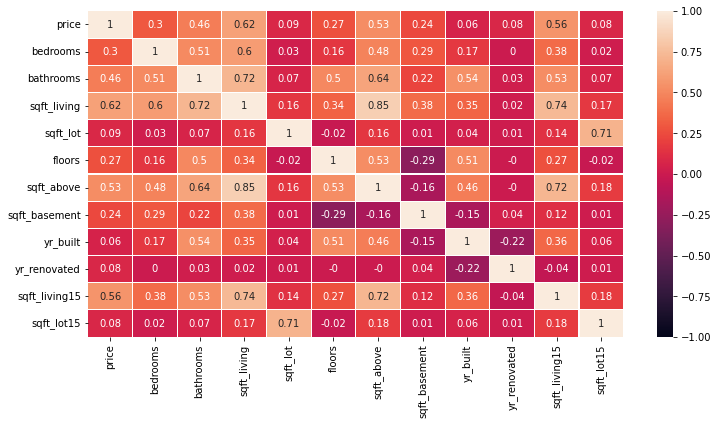

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr().round(2), annot=True, vmin=-1, vmax=1, linewidths=.1)

Abaixo irei separar em target e variáveis numéricas apenas para pegar a relação ordenada das variáveis que possuem maior correlação com ‘price’.

In [ ]:
target = 'price'
num_vars = df2.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove(target)

In [ ]:
corr_matrix = df2[num_vars + [target]].corr().round(2)
corr_matrix[target].sort_values(ascending=False)

price            1.00
sqft_living      0.62
sqft_living15    0.56
sqft_above       0.53
bathrooms        0.46
bedrooms         0.30
floors           0.27
sqft_basement    0.24
sqft_lot         0.09
yr_renovated     0.08
sqft_lot15       0.08
yr_built         0.06
Name: price, dtype: float64

##Sqft_living, Sqft_above e Sqft_living15

Como mostrado acima, as variáveis ‘Sqft_living’ (metragem quadrada do espaço interior), ‘Sqft_above’ (metragem quadrada do espaço interior da habitação que está acima do nível do solo) e ‘Sqft_living15’ (metragem quadrada do espaço habitacional interior para os 15 vizinhos mais próximos) são as que possuem maior correlação com a variável ‘price’. 

In [ ]:
#função para criação do gráfico scatterplot
def scatterplot(x,y):
  plt.figure(figsize=(8, 4))
  sns.scatterplot(x=x, y=y, data=df2)

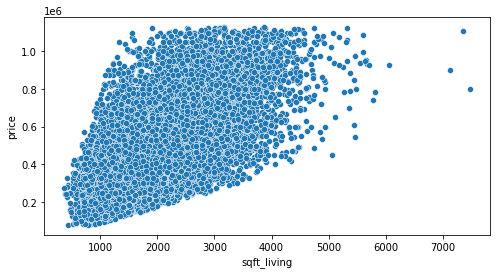

In [ ]:
scatterplot("sqft_living", "price")

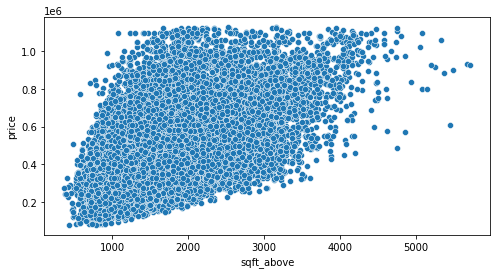

In [ ]:
scatterplot("sqft_above", "price")

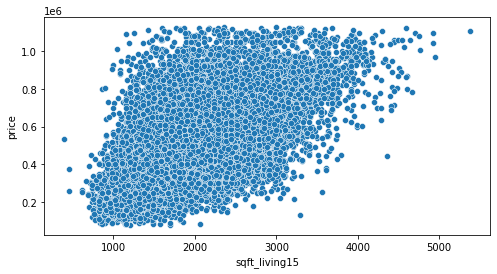

In [ ]:
scatterplot("sqft_living15", "price")

Como as três variáveis são muito parecidas (todas tem relação com a metragem quadrada do espaço interior), creio que não há a necessidade de fazer uma análise de todas, já que os resultados serão muito parecidos. Irei analisar somente a ‘Sqft_living’, que é a que possui a maior correlação com ‘price’.

Para conseguir ter uma melhor visualização, resolvi separar a metragem quadrada em grupos. 

In [ ]:
#Checar a metragem mínima e máxima
df2.sqft_living.describe()

count    20452.000000
mean      1976.060874
std        774.580745
min        370.000000
25%       1400.000000
50%       1860.000000
75%       2434.750000
max       7480.000000
Name: sqft_living, dtype: float64

In [ ]:
condicoes = [  
  (df2['sqft_living'] > 360) & (df2['sqft_living'] <= 1000),
  (df2['sqft_living'] > 1000) & (df2['sqft_living'] <= 2000),
  (df2['sqft_living'] > 2000) & (df2['sqft_living'] <= 3000),
  (df2['sqft_living'] > 3000) & (df2['sqft_living'] <= 4000),
  (df2['sqft_living'] > 4000) & (df2['sqft_living'] <= 5000),
  (df2['sqft_living'] > 5000) & (df2['sqft_living'] <= 6000),
  (df2['sqft_living'] > 6000) & (df2['sqft_living'] <= 7000),
  (df2['sqft_living'] > 7000)
    ]

valores = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-7500']

df2["sqft_living_cat"] = np.select(condicoes, valores) # Construindo variável

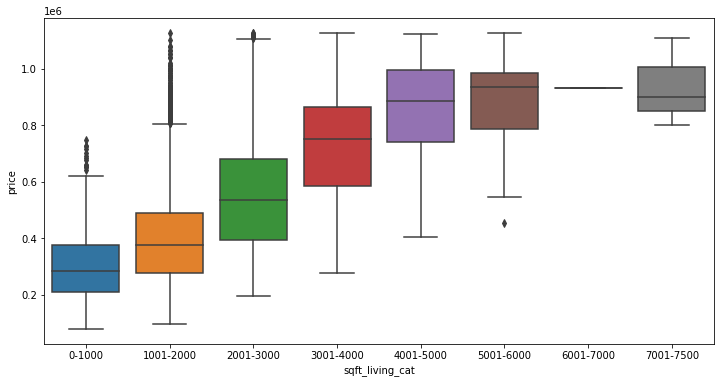

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="sqft_living_cat", y="price", data=df2,
            order=['0-1000', '1001-2000', '2001-3000', '3001-4000',
                   '4001-5000', '5001-6000', '6001-7000', '7001-7500'])

Como esperado, é possível ver acima um aumento de ‘price’ à medida que aumenta a metragem quadrada do espaço interior. 

Abaixo, irei ver o valor médio de ‘price’ de cada grupo e qual incremento temos a cada faixa que subimos. 

In [ ]:
df2.groupby(['sqft_living_cat']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
sqft_living_cat,,,,,,,,,,,,
0-1000,298619.88,2.17,1.06,848.88,10107.73,1.09,838.23,10.65,1945.62,61.58,1315.53,8652.29
1001-2000,397340.17,3.05,1.79,1523.61,10628.78,1.39,1350.35,173.26,1966.59,67.66,1637.92,9514.04
2001-3000,552498.04,3.75,2.40,2421.60,16650.06,1.58,2020.09,401.52,1976.70,87.84,2194.22,14397.93
3001-4000,726954.11,4.11,2.83,3366.59,26194.84,1.82,2933.18,433.41,1989.46,77.62,2780.01,20223.86
4001-5000,849619.05,4.39,3.36,4320.10,52520.59,1.90,3628.24,691.86,1992.83,84.36,3248.30,35703.83
5001-6000,886561.29,4.71,3.85,5387.48,75770.26,1.81,4238.19,1149.29,1991.90,0.00,3412.55,62843.35
6001-7000,930000.00,4.00,4.00,6050.00,84942.00,2.50,4150.00,1900.00,2009.00,0.00,2700.00,199504.00
7001-7500,936666.67,5.67,5.42,7316.67,31567.00,2.00,5103.33,2213.33,1987.00,0.00,3876.67,27545.33


In [ ]:
sqft_living_cat_price = df2.groupby(['sqft_living_cat']).mean().round(2).iloc[:,:1]
sqft_living_cat_price

,price
sqft_living_cat,
0-1000,298619.88
1001-2000,397340.17
2001-3000,552498.04
3001-4000,726954.11
4001-5000,849619.05
5001-6000,886561.29
6001-7000,930000.00
7001-7500,936666.67


In [ ]:
sqft_living_cat_price['incremento_%'] = [0,
                                    (sqft_living_cat_price.price[1] / sqft_living_cat_price.price[0]).round(2)*100-100,
                                    (sqft_living_cat_price.price[2] / sqft_living_cat_price.price[1]).round(2)*100-100,
                                    (sqft_living_cat_price.price[3] / sqft_living_cat_price.price[2]).round(2)*100-100,
                                    (sqft_living_cat_price.price[4] / sqft_living_cat_price.price[3]).round(2)*100-100,
                                    (sqft_living_cat_price.price[5] / sqft_living_cat_price.price[4]).round(2)*100-100,
                                    (sqft_living_cat_price.price[6] / sqft_living_cat_price.price[5]).round(2)*100-100,
                                    (sqft_living_cat_price.price[7] / sqft_living_cat_price.price[6]).round(2)*100-100,
                                          ]

sqft_living_cat_price

,price,incremento_%
sqft_living_cat,,
0-1000,298619.88,0.0
1001-2000,397340.17,33.0
2001-3000,552498.04,39.0
3001-4000,726954.11,32.0
4001-5000,849619.05,17.0
5001-6000,886561.29,4.0
6001-7000,930000.00,5.0
7001-7500,936666.67,1.0


Como observado na tabela acima, o valor médio de ‘price’ sobe a cada aumento de faixa dos grupos, sendo que os incrementos são mais expressivos nos primeiros níveis (33%, 39% e 32%).

In [ ]:
#função para criação do gráfico barplot
def barplot(dataframe, y, x):
  plt.figure(figsize=(12, 6))
  sns.barplot(data=dataframe, y=y,
            x=x, ci=None)   #ci=None retira a barra de erro

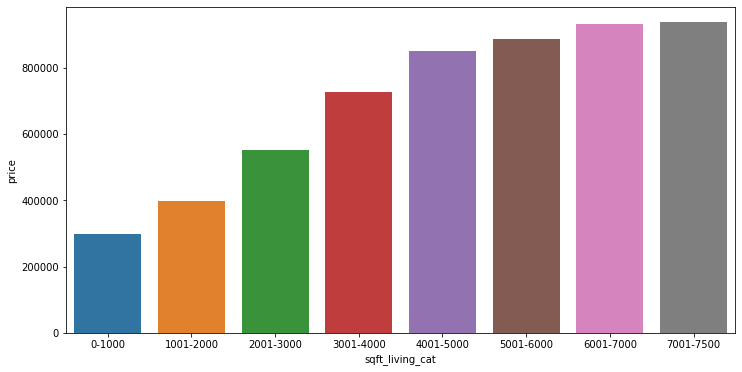

In [ ]:
barplot(sqft_living_cat_price, 'price', sqft_living_cat_price.index)

##Bathrooms (banheiros)

A maneira como o número de banheiros é contado nos Estados Unidos é bem diferente do que estamos acostumados no Brasil. O padrão deste dataset é:

- 0,5 representa um local com vaso sanitário e uma pia;
- 0,75 é um banheiro que contém uma pia, um vaso sanitário e um chuveiro ou banheira;
- 1,0 (banheiro completo) contém uma pia, um vaso sanitário, um chuveiro e uma banheira.

Porém, como será visto abaixo no boxplot, alguns imóveis tem uma contagem de banheiros com 0.25. Infelizmente, não consegui encontrar a explicação para estes dados.

In [ ]:
#função para criação do gráfico boxplot
def boxplot(x,y):
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=x, y=y, data=df2)

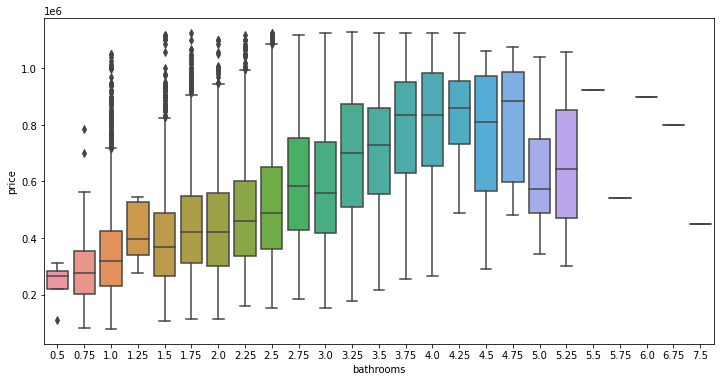

In [ ]:
boxplot('bathrooms','price')

Como observado no boxplot, aparentemente, há uma valorização crescente de ‘price’ até 4 banheiros. A partir daí, existe uma oscilação. Abaixo, irei checar o valor médio de ‘price’ de cada quantidade.

In [ ]:
df2.groupby(['bathrooms']).mean().round(2)

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bathrooms,,,,,,,,,,,
0.50,237375.00,2.25,1235.00,5465.50,1.25,992.50,242.50,1948.00,0.00,1545.00,5844.75
0.75,294936.65,1.90,903.83,16729.94,1.08,835.66,68.17,1943.46,111.93,1464.11,17062.80
1.00,346576.99,2.64,1180.98,11427.37,1.11,1094.42,86.56,1944.43,65.56,1450.66,9861.93
1.25,422278.57,2.29,1360.00,4295.86,1.79,1087.14,272.86,1983.43,0.00,1548.57,4923.14
1.50,402978.34,3.04,1539.73,11081.94,1.35,1344.38,195.35,1960.22,51.40,1611.85,9743.26
1.75,444828.20,3.23,1777.72,15161.83,1.14,1399.57,378.15,1960.73,83.93,1785.65,13266.31
2.00,447526.27,3.31,1788.28,14245.16,1.29,1483.31,304.98,1961.40,143.10,1728.01,12043.73
2.25,491232.52,3.41,2051.80,14085.74,1.60,1723.30,328.50,1979.02,37.76,1981.15,12882.95
2.50,521581.44,3.55,2347.89,14480.54,1.84,2158.84,189.05,1991.98,41.20,2232.18,12691.66


In [ ]:
bathrooms_price = df2.groupby(['bathrooms']).mean().round(2).iloc[:,:1]
bathrooms_price

,price
bathrooms,
0.50,237375.00
0.75,294936.65
1.00,346576.99
1.25,422278.57
1.50,402978.34
1.75,444828.20
2.00,447526.27
2.25,491232.52
2.50,521581.44


In [ ]:
bathrooms_price['incremento_%'] = [0,
                                 (bathrooms_price.price[0.75] / bathrooms_price.price[0.50]).round(2)*100-100,
                                 (bathrooms_price.price[1] / bathrooms_price.price[0.75]).round(2)*100-100,
                                 (bathrooms_price.price[1.25] / bathrooms_price.price[1]).round(2)*100-100,
                                 (bathrooms_price.price[1.5] / bathrooms_price.price[1.25]).round(2)*100-100,
                                 (bathrooms_price.price[1.75] / bathrooms_price.price[1.5]).round(2)*100-100,
                                 (bathrooms_price.price[2] / bathrooms_price.price[1.75]).round(2)*100-100,
                                 (bathrooms_price.price[2.25] / bathrooms_price.price[2]).round(2)*100-100,
                                 (bathrooms_price.price[2.5] / bathrooms_price.price[2.25]).round(2)*100-100,
                                 (bathrooms_price.price[2.75] / bathrooms_price.price[2.5]).round(2)*100-100,
                                 (bathrooms_price.price[3] / bathrooms_price.price[2.75]).round(2)*100-100,
                                 (bathrooms_price.price[3.25] / bathrooms_price.price[3]).round(2)*100-100,
                                 (bathrooms_price.price[3.5] / bathrooms_price.price[3.25]).round(2)*100-100,
                                 (bathrooms_price.price[3.75] / bathrooms_price.price[3.5]).round(2)*100-100,
                                 (bathrooms_price.price[4] / bathrooms_price.price[3.75]).round(2)*100-100,
                                 (bathrooms_price.price[4.25] / bathrooms_price.price[4]).round(2)*100-100,
                                 (bathrooms_price.price[4.5] / bathrooms_price.price[4.25]).round(2)*100-100,
                                 (bathrooms_price.price[4.75] / bathrooms_price.price[4.5]).round(2)*100-100,
                                 (bathrooms_price.price[5] / bathrooms_price.price[4.75]).round(2)*100-100,
                                 (bathrooms_price.price[5.25] / bathrooms_price.price[5]).round(2)*100-100,
                                 (bathrooms_price.price[5.5] / bathrooms_price.price[5.25]).round(2)*100-100,
                                 (bathrooms_price.price[5.75] / bathrooms_price.price[5.5]).round(2)*100-100,
                                 (bathrooms_price.price[6] / bathrooms_price.price[5.75]).round(2)*100-100,
                                 (bathrooms_price.price[6.75] / bathrooms_price.price[6]).round(2)*100-100,
                                 (bathrooms_price.price[7.5] / bathrooms_price.price[6.75]).round(2)*100-100                                    
                   ]

bathrooms_price

,price,incremento_%
bathrooms,,
0.50,237375.00,0.0
0.75,294936.65,24.0
1.00,346576.99,18.0
1.25,422278.57,22.0
1.50,402978.34,-5.0
1.75,444828.20,10.0
2.00,447526.27,1.0
2.25,491232.52,10.0
2.50,521581.44,6.0


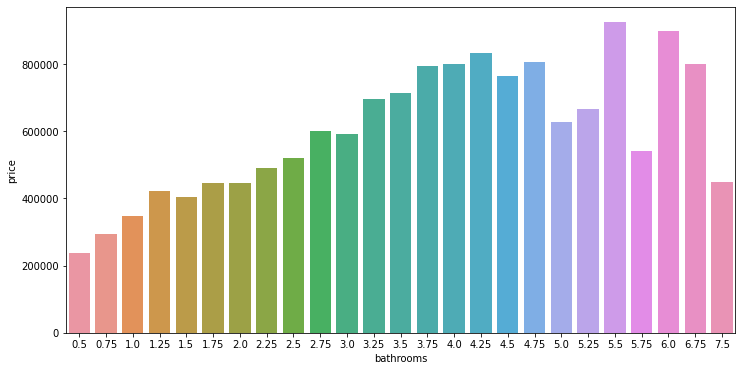

In [ ]:
barplot(bathrooms_price, 'price', bathrooms_price.index)

Através da tabela e gráfico acima observamos que há um aumento gradual, mas com algumas oscilações até 4.25 banheiros. A partir daí, existem quedas e aumentos abruptos do valor médio de ‘price’.

##Bedrooms (quartos)

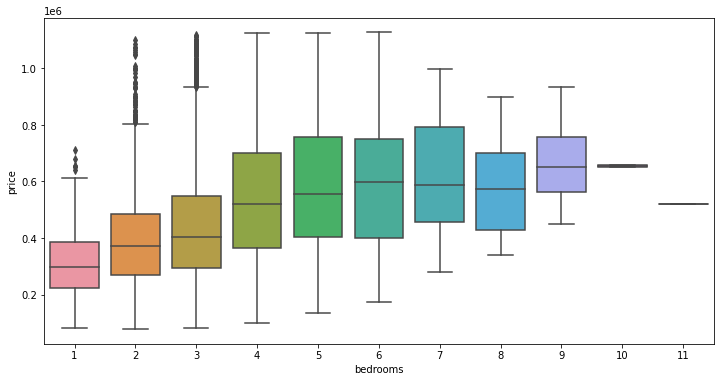

In [ ]:
boxplot('bedrooms', 'price')

Como observado no boxplot, aparentemente, os imóveis mais valorizados são os que possuem de 4 a 6 quartos.

Abaixo, irei checar o valor médio de ‘price’ de cada quantidade de quartos e qual incremento temos a cada quarto a mais. 

In [ ]:
df2.groupby(['bedrooms']).mean().round(2)

,price,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,
1,313461.20,1.08,883.43,16126.45,1.15,824.40,59.03,1942.35,173.12,1447.92,14071.86
2,391923.59,1.39,1225.50,11779.76,1.30,1097.11,128.39,1955.29,78.45,1493.96,9543.92
3,440016.89,1.95,1772.11,14364.24,1.44,1560.23,211.88,1971.89,69.67,1809.32,12780.62
4,546720.46,2.36,2430.08,15828.02,1.60,2101.34,328.74,1976.63,73.83,2210.77,13136.31
5,586984.65,2.61,2782.20,15884.95,1.53,2182.26,599.94,1973.34,77.49,2291.03,12373.65
6,598765.01,2.87,2924.42,16505.13,1.53,2220.95,703.47,1962.38,147.42,2084.71,13105.23
7,621833.90,3.39,3359.33,13054.77,1.58,2731.67,627.67,1960.90,200.07,2039.00,10265.33
8,588444.44,3.33,3207.78,7591.11,1.50,2111.11,1096.67,1960.00,0.00,1675.56,5451.33
9,670999.75,4.50,3595.00,5593.00,2.12,2802.50,792.50,1940.00,0.00,1832.00,4251.75


In [ ]:
bedrooms_price = df2.groupby(['bedrooms']).mean().round(2).iloc[:,:1]
bedrooms_price

,price
bedrooms,
1,313461.20
2,391923.59
3,440016.89
4,546720.46
5,586984.65
6,598765.01
7,621833.90
8,588444.44
9,670999.75


In [ ]:
bedrooms_price['incremento_%'] = [0,                                
                                (bedrooms_price.price[2] / bedrooms_price.price[1]).round(2)*100-100,
                                (bedrooms_price.price[3] / bedrooms_price.price[2]).round(2)*100-100,
                                (bedrooms_price.price[4] / bedrooms_price.price[3]).round(2)*100-100,
                                (bedrooms_price.price[5] / bedrooms_price.price[4]).round(2)*100-100,
                                (bedrooms_price.price[6] / bedrooms_price.price[5]).round(2)*100-100,
                                (bedrooms_price.price[7] / bedrooms_price.price[6]).round(2)*100-100,
                                (bedrooms_price.price[8] / bedrooms_price.price[7]).round(2)*100-100,
                                (bedrooms_price.price[9] / bedrooms_price.price[8]).round(2)*100-100,
                                (bedrooms_price.price[10] / bedrooms_price.price[9]).round(2)*100-100,
                                (bedrooms_price.price[11] / bedrooms_price.price[10]).round(2)*100-100
                                  ]

bedrooms_price

,price,incremento_%
bedrooms,,
1,313461.20,0.0
2,391923.59,25.0
3,440016.89,12.0
4,546720.46,24.0
5,586984.65,7.0
6,598765.01,2.0
7,621833.90,4.0
8,588444.44,-5.0
9,670999.75,14.0


Como observado na tabela acima, há um aumento percentual do valor médio de ‘price’ até imóveis de 7 quartos. A partir daí, há algumas oscilações, como pode ser verificado também no gráfico abaixo.

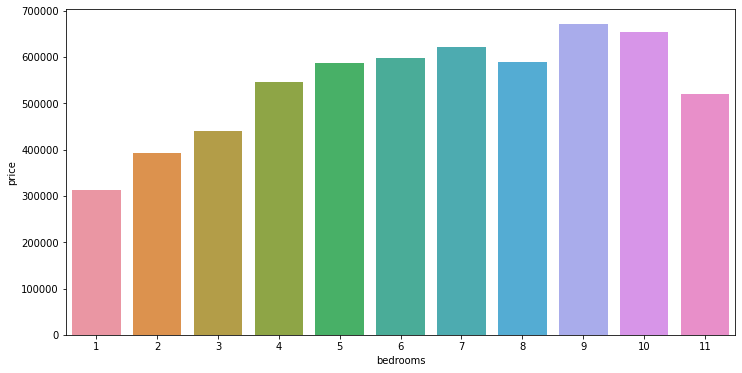

In [ ]:
barplot(bedrooms_price, 'price', bedrooms_price.index)

##Floors (andares)

Obs: Não veio no dataset uma explicação do porque existem 1.5, 2.5 e 3.5 como número de andares.

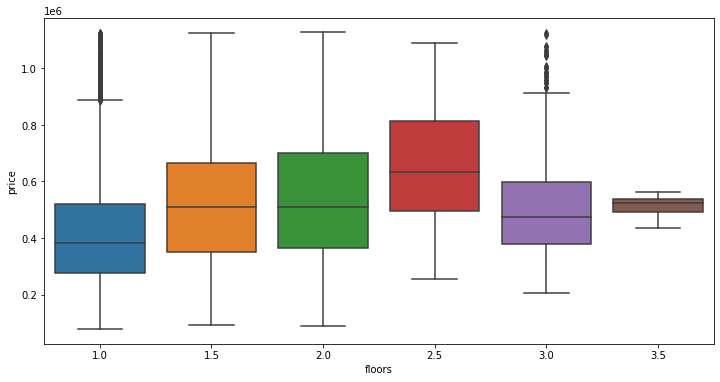

In [ ]:
boxplot('floors', 'price')

‘Floors’ teve uma correlação de apenas 0.27 com ‘price’ e isto fica perceptível ao visualizarmos o boxplot. 

Abaixo, irei checar o valor médio de ‘price’ de cada quantidade de andares e qual incremento temos a cada andar a mais. 

In [ ]:
df2.groupby(['floors']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
floors,,,,,,,,,,,
1.0,416468.80,3.14,1.73,1692.98,14430.36,1309.94,383.04,1960.22,68.97,1745.79,12442.50
1.5,516156.13,3.49,1.73,1850.88,16988.97,1606.35,244.53,1934.86,127.67,1710.32,13138.32
2.0,546929.42,3.58,2.55,2419.71,15176.07,2288.90,130.82,1991.60,71.64,2248.71,12937.68
2.5,645385.14,3.66,2.59,2551.55,18664.89,2362.04,189.52,1975.65,236.39,2072.60,19278.14
3.0,511166.19,2.89,2.42,1623.27,1941.38,1585.74,37.53,2005.29,20.95,1524.78,2324.04
3.5,511916.67,2.67,2.71,1561.67,1299.33,1561.67,0.00,2005.17,0.00,1415.00,1313.67


In [ ]:
floors_price = df2.groupby(['floors']).mean().round(2).iloc[:,:1]
floors_price

,price
floors,
1.0,416468.80
1.5,516156.13
2.0,546929.42
2.5,645385.14
3.0,511166.19
3.5,511916.67


In [ ]:
floors_price['incremento_%'] = [0,
                              (floors_price.price[1.5] / floors_price.price[1]).round(2)*100-100,
                              (floors_price.price[2] / floors_price.price[1.5]).round(2)*100-100,
                              (floors_price.price[2.5] / floors_price.price[2]).round(2)*100-100,
                              (floors_price.price[3] / floors_price.price[2.5]).round(2)*100-100,
                              (floors_price.price[3.5] / floors_price.price[3]).round(2)*100-100       
                   ]

floors_price

,price,incremento_%
floors,,
1.0,416468.80,0.0
1.5,516156.13,24.0
2.0,546929.42,6.0
2.5,645385.14,18.0
3.0,511166.19,-21.0
3.5,511916.67,0.0


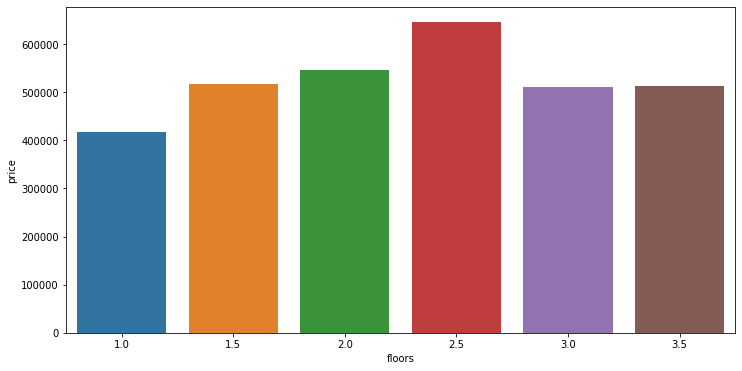

In [ ]:
barplot(floors_price, 'price', floors_price.index)

Como observado na tabela e gráfico acima, há um aumento de ‘price’ até 2.5 andares e no seguinte uma queda.


#Variáveis Categóricas

##Yr_built (ano que o imóvel foi construído)

Para facilitar a análise, vou separar os anos em grupos.

In [ ]:
condicoes = [  
  (df2['yr_built'] >= 1900) & (df2['yr_built'] < 1910),
  (df2['yr_built'] >= 1910) & (df2['yr_built'] < 1920),
  (df2['yr_built'] >= 1920) & (df2['yr_built'] < 1930),
  (df2['yr_built'] >= 1930) & (df2['yr_built'] < 1940),
  (df2['yr_built'] >= 1940) & (df2['yr_built'] < 1950),
  (df2['yr_built'] >= 1950) & (df2['yr_built'] < 1960),
  (df2['yr_built'] >= 1960) & (df2['yr_built'] < 1970),
  (df2['yr_built'] >= 1970) & (df2['yr_built'] < 1980),
  (df2['yr_built'] >= 1980) & (df2['yr_built'] < 1990),
  (df2['yr_built'] >= 1990) & (df2['yr_built'] < 2000),
  (df2['yr_built'] >= 2000)
    ]
valores = ['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949',
           '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999',
           '2000-2015']

df2["yr_built_cat"] = np.select(condicoes, valores) 

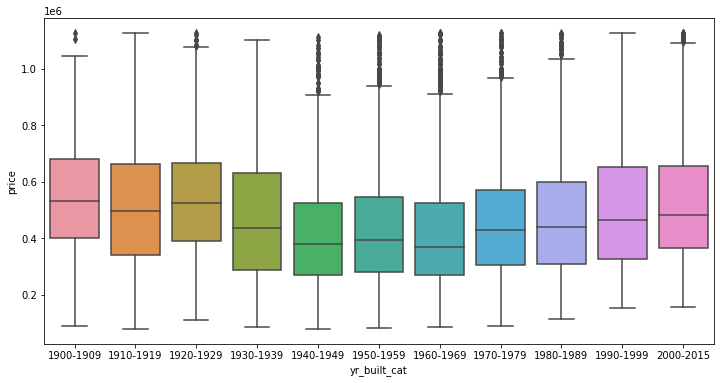

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="yr_built_cat", y="price", data=df2,
            order=['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949',
           '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999',
           '2000-2015'])

O boxplot acima mostra uma aparente valorização de imóveis antigos. Isto também poderá ser verificado abaixo, ao observarmos a média do preço de cada faixa e como foi o aumento ou queda percentual de um grupo para o seguinte.

In [ ]:
df2.groupby(['yr_built_cat']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
yr_built_cat,,,,,,,,,,,,
1900-1909,540471.80,3.13,1.62,1634.60,6710.82,1.46,1401.40,233.20,1905.08,290.13,1622.48,5373.38
1910-1919,514849.96,3.08,1.62,1645.79,9446.33,1.35,1336.00,309.78,1914.46,266.99,1596.19,6861.96
1920-1929,535193.89,3.07,1.61,1654.81,8972.90,1.34,1313.38,341.43,1924.85,196.80,1632.20,6950.15
1930-1939,475482.43,2.98,1.59,1643.53,17169.08,1.30,1357.46,286.07,1934.73,280.35,1661.72,12382.46
1940-1949,411898.45,2.84,1.45,1455.18,10505.43,1.15,1184.67,270.50,1944.74,159.16,1524.45,10006.13
1950-1959,435142.33,3.23,1.60,1689.21,12225.88,1.07,1363.51,325.70,1954.63,101.85,1710.74,10266.59
1960-1969,417594.55,3.57,1.85,1879.10,13876.71,1.09,1492.50,386.60,1964.78,63.19,1826.47,12653.50
1970-1979,457642.02,3.54,2.11,2085.87,19334.68,1.22,1622.66,463.20,1975.74,31.71,2019.07,16603.61
1980-1989,478592.32,3.33,2.27,2116.77,22331.49,1.52,1879.54,237.22,1984.90,19.29,2084.57,19121.49


In [ ]:
yr_built_cat_price = df2.groupby(['yr_built_cat']).mean().round(2).iloc[:,:1]
yr_built_cat_price 

,price
yr_built_cat,
1900-1909,540471.80
1910-1919,514849.96
1920-1929,535193.89
1930-1939,475482.43
1940-1949,411898.45
1950-1959,435142.33
1960-1969,417594.55
1970-1979,457642.02
1980-1989,478592.32


In [ ]:
yr_built_cat_price['incremento_%'] = [0,
                              (yr_built_cat_price.price[1] / yr_built_cat_price.price[0]).round(2)*100-100,
                              (yr_built_cat_price.price[2] / yr_built_cat_price.price[1]).round(2)*100-100,
                              (yr_built_cat_price.price[3] / yr_built_cat_price.price[2]).round(2)*100-100,
                              (yr_built_cat_price.price[4] / yr_built_cat_price.price[3]).round(2)*100-100,
                              (yr_built_cat_price.price[5] / yr_built_cat_price.price[4]).round(2)*100-100,
                              (yr_built_cat_price.price[6] / yr_built_cat_price.price[5]).round(2)*100-100,
                              (yr_built_cat_price.price[7] / yr_built_cat_price.price[6]).round(2)*100-100,
                              (yr_built_cat_price.price[8] / yr_built_cat_price.price[7]).round(2)*100-100,
                              (yr_built_cat_price.price[9] / yr_built_cat_price.price[8]).round(2)*100-100,
                              (yr_built_cat_price.price[10] / yr_built_cat_price.price[9]).round(2)*100-100     
                   ]

yr_built_cat_price

,price,incremento_%
yr_built_cat,,
1900-1909,540471.80,0.0
1910-1919,514849.96,-5.0
1920-1929,535193.89,4.0
1930-1939,475482.43,-11.0
1940-1949,411898.45,-13.0
1950-1959,435142.33,6.0
1960-1969,417594.55,-4.0
1970-1979,457642.02,10.0
1980-1989,478592.32,5.0


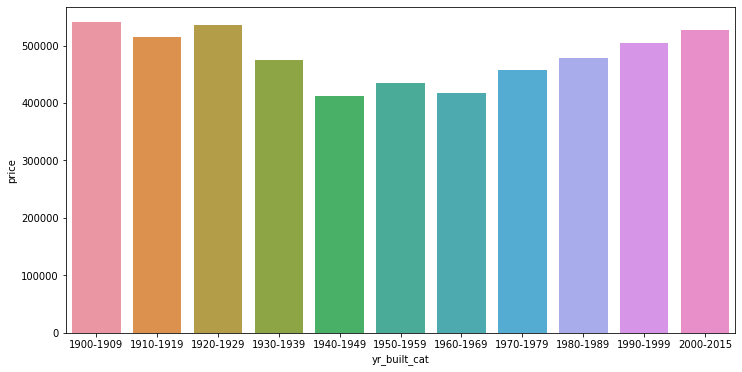

In [ ]:
barplot(yr_built_cat_price, 'price', yr_built_cat_price.index)

##Yr_renovated (ano da última reforma da casa)

Primeiramente vou criar uma nova coluna, a "renovated" (reformada), em que diz se o imóvel foi ou não reformado.

In [ ]:
condicoes = [  
  (df2['yr_renovated'] == 0),
  (df2['yr_renovated'] != 0)
    ]

valores = [0,1]

df2["renovated"] = np.select(condicoes, valores) # Construindo variável

Agora vou checar a correlação de “renovated” com “price”.

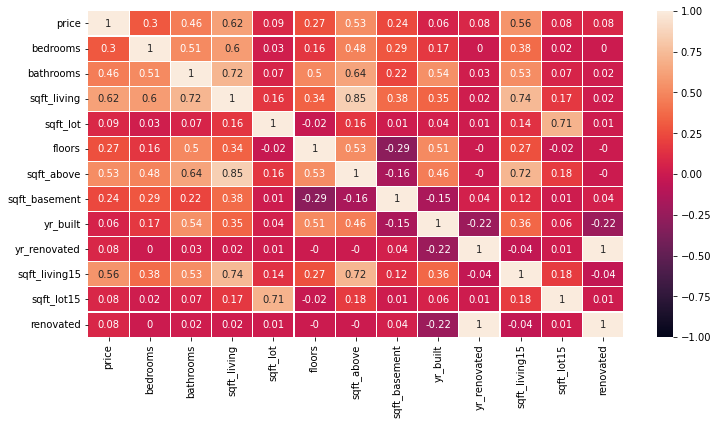

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr().round(2), annot=True, vmin=-1, vmax=1, linewidths=.1)

A correlação entre eles é praticamente zero (0.08), como pode ser observado também no boxplot abaixo.

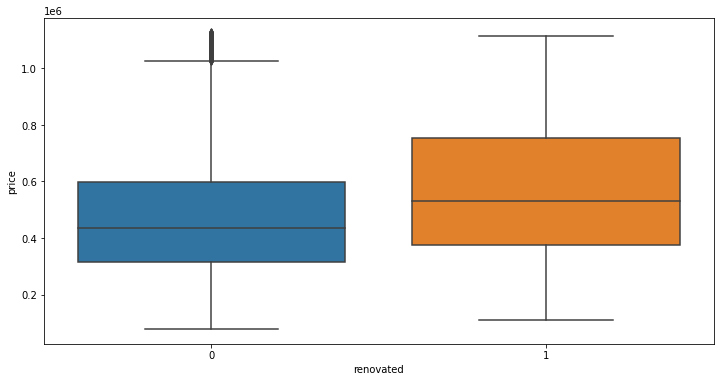

In [ ]:
boxplot('renovated', 'price')

Vale destacar que uma pequena parcela dos imóveis (aproximadamente 4%) foi reformada.

In [ ]:
# Distribuição de 'renovated'
# 0 No renovated
# 1 Renovated
df2.renovated.value_counts()

0    19686
1      766
Name: renovated, dtype: int64

Porém, como pode ser visto abaixo, ao fazermos um agrupamento, observamos que há uma diferença considerável no preço médio entre imóveis reformados ou não, seja utilizando a média ou a mediana.

Usando a média:

- Valor médio dos imóveis sem reforma: 473.681.36
- Valor médio dos imóveis com reforma: 564.862.82 (19% maior)
	
Usando a mediana:

- Valor médio dos imóveis sem reforma: 435.000.00	
- Valor médio dos imóveis com reforma: 529.500.00 (22% maior)

In [ ]:
df2.groupby(['renovated']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
renovated,,,,,,,,,,,,
0,473681.36,3.33,2.05,1972.93,14517.04,1.48,1708.93,264.00,1972.06,0.00,1927.50,12388.16
1,564862.82,3.35,2.14,2056.64,16803.91,1.47,1701.16,355.48,1938.48,1995.43,1791.71,13697.45


In [ ]:
df2.groupby(['renovated']).median().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
renovated,,,,,,,,,,,,
0,435000.0,3.0,2.0,1850.0,7504.5,1.0,1510.0,0.0,1976.0,0.0,1800.0,7560.0
1,529500.0,3.0,2.0,1980.0,7133.0,1.5,1600.0,0.0,1941.0,1999.0,1690.0,7200.0


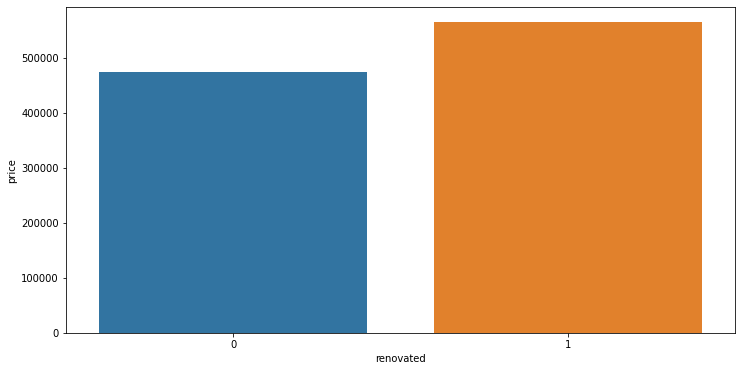

In [ ]:
barplot(df2, 'price', 'renovated')

##Waterfront (com vista para a orla ou não)

In [ ]:
# Distribuição de 'waterfront'
# 0 No waterfront view
# 1 Has a waterfront view
df2.waterfront.value_counts(sort=False)

0    20391
1       61
Name: waterfront, dtype: int64

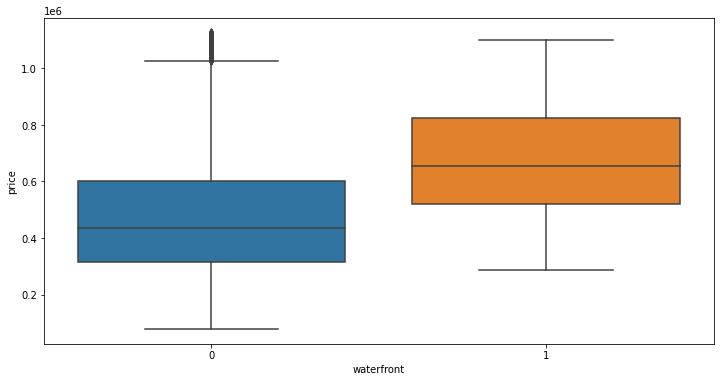

In [ ]:
boxplot('waterfront', 'price')

In [ ]:
df2.groupby(['waterfront']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
waterfront,,,,,,,,,,,,,
0,476510.21,3.33,2.05,1975.98,14548.32,1.48,1708.86,267.13,1970.87,73.50,1922.26,12392.02,0.04
1,673056.43,2.82,2.00,2001.69,32777.57,1.46,1635.31,366.38,1950.03,488.48,1972.66,27539.02,0.25


Podemos observar acima que pouquíssimos imóveis possuem vista para a orla (apenas 0,02%). Mas como era de se imaginar, ter vista para a orla valoriza bastante o imóvel (o preço médio é 41% maior).

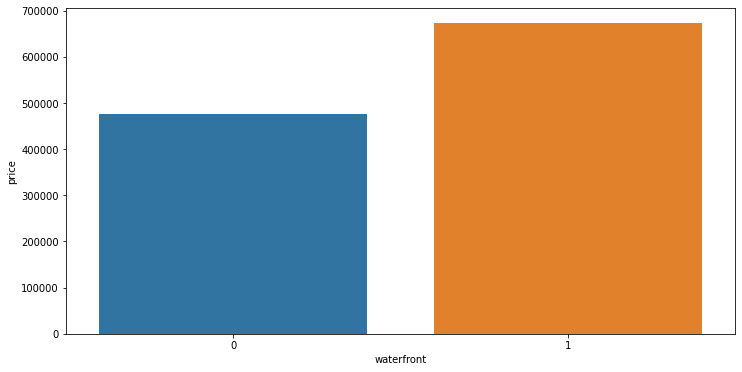

In [ ]:
barplot(df2, 'price', 'waterfront')

##View (quão boa era a vista da propriedade)

A coluna ‘View’ é um índice de quão boa era a vista da propriedade e foi dividida desta forma: Sem visualização, Razoável, Média, Bom e Excelente.



In [ ]:
# Distribuição de 'view' (how good the view of the property was)
# 0 No view
# 1 Fair
# 2 Average
# 3 Good
# 4 Excellent
df2.view.value_counts(sort=False)

0    18871
1      276
2      808
3      350
4      147
Name: view, dtype: int64

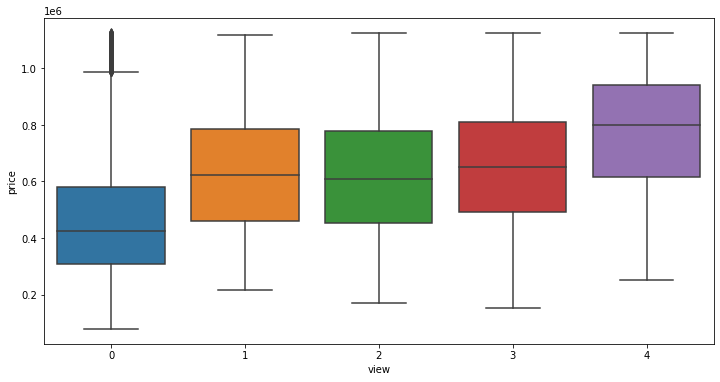

In [ ]:
boxplot('view', 'price')

O boxplot mostra que há uma aparente relação entre a nota e a variável ‘price’.

In [ ]:
df2.groupby(['view']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
view,,,,,,,,,,,,,
0,462766.67,3.32,2.03,1938.20,13808.02,1.48,1695.32,242.88,1971.41,68.53,1888.82,11947.15,0.03
1,628981.73,3.42,2.18,2297.49,12154.34,1.36,1732.92,564.57,1961.03,137.16,2248.74,10443.58,0.07
2,626562.36,3.47,2.28,2392.04,22102.42,1.45,1868.06,523.99,1964.00,118.49,2283.94,16778.77,0.06
3,661488.83,3.49,2.40,2566.67,38944.47,1.46,1962.07,604.59,1966.63,170.90,2405.33,27304.23,0.09
4,770910.71,3.43,2.31,2539.68,22034.84,1.46,1892.41,647.27,1958.48,284.58,2485.13,19827.99,0.14


In [ ]:
view_price = df2.groupby(['view']).mean().round(2).iloc[:,:1]
view_price

,price
view,
0,462766.67
1,628981.73
2,626562.36
3,661488.83
4,770910.71


In [ ]:
view_price['incremento_%'] = [0,
                            (view_price.price[1] / view_price.price[0]).round(2)*100-100,
                            (view_price.price[2] / view_price.price[1]).round(2)*100-100,
                            (view_price.price[3] / view_price.price[2]).round(2)*100-100,
                            (view_price.price[4] / view_price.price[3]).round(2)*100-100                                  
                   ]

view_price

,price,incremento_%
view,,
0,462766.67,0.0
1,628981.73,36.0
2,626562.36,0.0
3,661488.83,6.0
4,770910.71,17.0


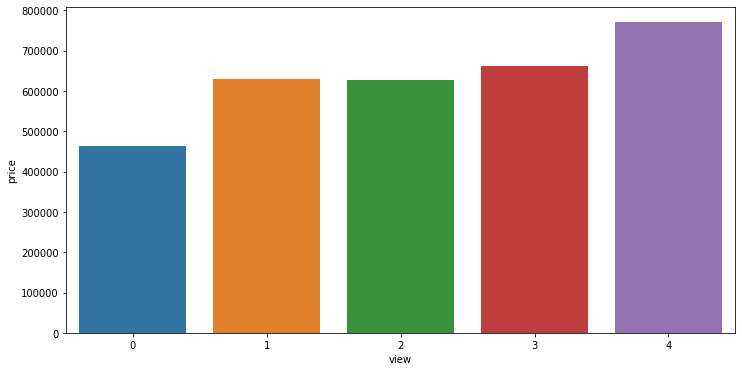

In [ ]:
barplot(view_price, 'price', view_price.index)

Como observado na tabela e gráfico acima, há um incremento percentual do valor médio de ‘price’ a cada aumento de nota. Vale destacar que os imóveis sem visualização possuem um valor médio muito abaixo dos demais.

##Condition (condição do imóvel)

A coluna ‘Condition’ é um índice de 1 a 5 sobre a condição do imóvel: Ruim, Razoável, Médio, Bom e Muito Bom.

In [ ]:
# Distribuição de 'condition' 
# 1 Poor- Worn out
# 2 Fair- Badly worn
# 3 Average
# 4 Good
# 5 Very Good
df2.condition.value_counts(sort=False)

1       28
2      168
3    13274
4     5421
5     1561
Name: condition, dtype: int64

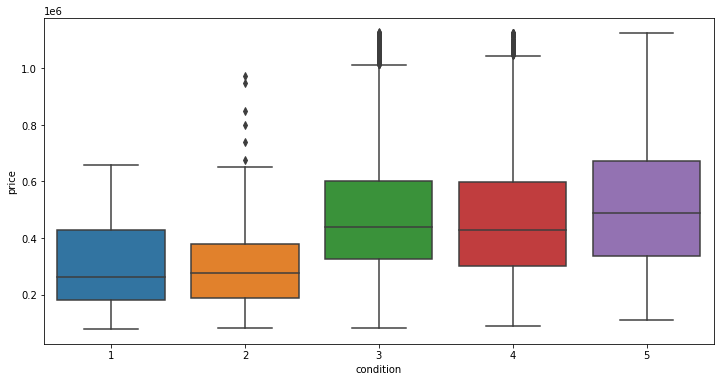

In [ ]:
boxplot('condition', 'price')

In [ ]:
df2.groupby(['condition']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
condition,,,,,,,,,,,,,
1,299676.79,2.54,1.21,1224.29,22202.96,1.16,1147.50,76.79,1929.57,71.14,1771.79,9256.79,0.04
2,309704.70,2.85,1.45,1391.43,32860.58,1.15,1225.36,166.07,1949.03,47.06,1566.95,19661.40,0.02
3,479399.83,3.33,2.16,2040.32,14038.16,1.61,1821.76,218.56,1979.07,93.35,1982.72,12075.99,0.05
4,465873.11,3.33,1.85,1869.32,15825.92,1.24,1528.31,341.01,1958.39,42.06,1840.51,13509.91,0.02
5,517683.05,3.38,1.94,1876.74,13053.96,1.23,1435.02,441.71,1946.74,32.95,1735.01,11062.98,0.02


In [ ]:
condition_price = df2.groupby(['condition']).mean().round(2).iloc[:,:1]
condition_price

,price
condition,
1,299676.79
2,309704.70
3,479399.83
4,465873.11
5,517683.05


In [ ]:
condition_price['incremento_%'] = [0,
                            (condition_price.price[1] / condition_price.price[0]).round(2)*100-100,
                            (condition_price.price[2] / condition_price.price[1]).round(2)*100-100,
                            (condition_price.price[3] / condition_price.price[2]).round(2)*100-100,
                            (condition_price.price[4] / condition_price.price[3]).round(2)*100-100                                  
                   ]

condition_price

,price,incremento_%
condition,,
1,299676.79,0.0
2,309704.70,3.0
3,479399.83,55.0
4,465873.11,-3.0
5,517683.05,11.0


Pode-se observar pelo boxplot e pela média do ‘price’ de cada nota, que não há uma variação grande de preço entre as notas 1 e 2.

Da nota 2 para a 3 há um salto (55% de incremento), mas há pouca diferença entre as notas 3 e 4. 

Já a nota 5 possui o valor médio do preço mais alto de todos, como era de se esperar.

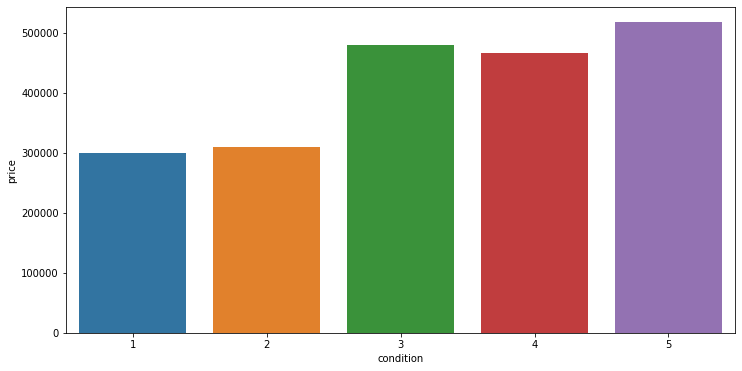

In [ ]:
barplot(condition_price, 'price', condition_price.index)

##Grade (qualidade da construção e projeto)

Conforme explicado anteriormente, a variável ‘Grade’ é um índice sobre a qualidade da construção e projeto:

* 1 - aquém da construção e projeto do edifício;
* 2 - nível médio de construção e projeto;
* 3 - nível de alta qualidade de construção e projeto.

In [ ]:
# Distribuição de 'grade' 
# 1 falls short of building construction and design
# 2 has an average level of construction and design
# 3 have a high quality level of construction and design.
df2.grade.value_counts(sort=False)

1        1
2    20307
3      144
Name: grade, dtype: int64

Só há um imóvel com a nota mínima nesta variável.

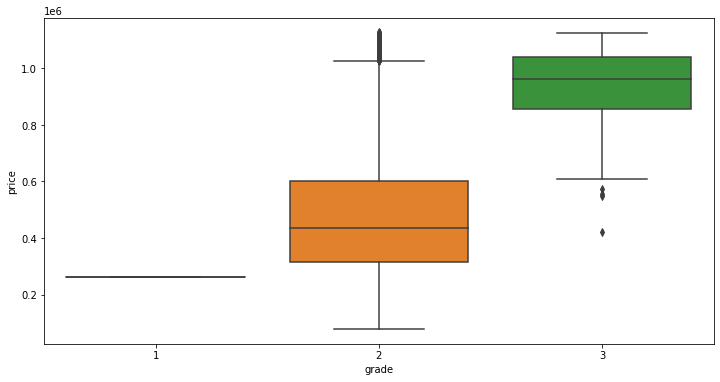

In [ ]:
boxplot('grade', 'price')

In [ ]:
df2.groupby(['grade']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
grade,,,,,,,,,,,,,
1,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,0.00,1920.00,0.00,1340.00,12233.00,0.00
2,473864.13,3.33,2.04,1961.85,14449.84,1.47,1694.06,267.78,1970.64,75.17,1910.79,12304.82,0.04
3,934411.03,4.08,3.23,3990.74,36168.90,1.97,3772.03,218.71,1995.01,13.88,3566.04,31106.43,0.01


In [ ]:
grade_price = df2.groupby(['grade']).mean().round(2).iloc[:,:1]
grade_price

,price
grade,
1,262000.00
2,473864.13
3,934411.03


In [ ]:
grade_price['incremento_%'] = [0,
                            (grade_price.price[1] / grade_price.price[0]).round(2)*100-100,
                            (grade_price.price[2] / grade_price.price[1]).round(2)*100-100                                                            
                   ]

grade_price

,price,incremento_%
grade,,
1,262000.00,0.0
2,473864.13,81.0
3,934411.03,97.0


Por ter uma amostra extremamente pequena, a nota 1 não será considerada nesta análise. Já a nota 3 possui um valor médio do ‘price’ 97% maior do que a nota 2.

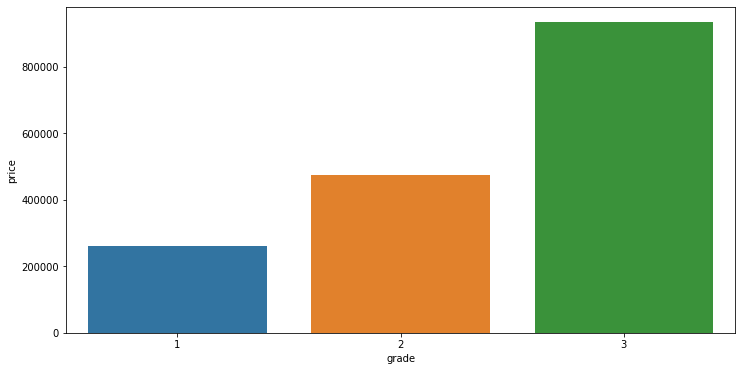

In [ ]:
barplot(grade_price, 'price', grade_price.index)

#Variável date

###Checando o Ano da venda

Todos os imóveis foram vendidos em 2014 ou 2015. Como pode-se observar abaixo, em relação ao ano de venda, não há praticamente diferença no valor médio de ‘price’.

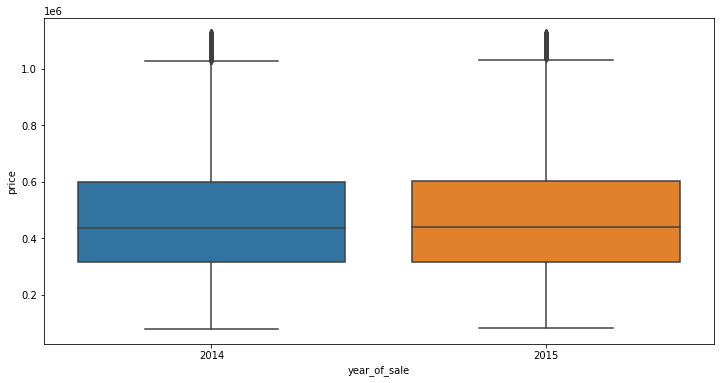

In [ ]:
boxplot("year_of_sale", "price")

In [ ]:
df2.groupby(['year_of_sale']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
year_of_sale,,,,,,,,,,,,,
2014,476776.12,3.34,2.07,1993.01,14577.73,1.48,1721.85,271.16,1970.78,80.8,1933.27,12499.19,0.04
2015,477768.99,3.32,2.02,1940.48,14655.10,1.46,1680.90,259.58,1970.86,62.0,1899.61,12307.03,0.03


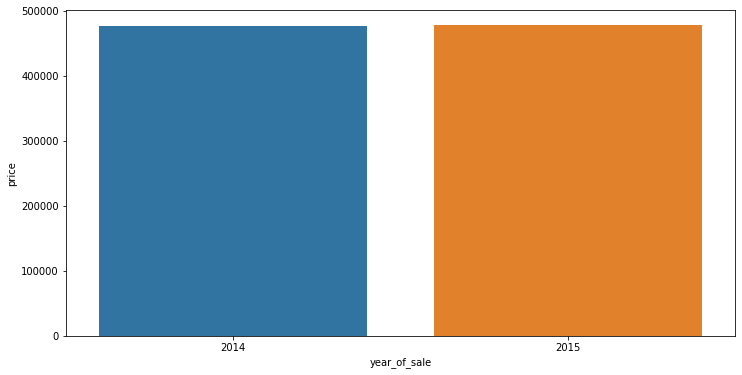

In [ ]:
barplot(df2, 'price', 'year_of_sale')

###Checando o Mês da venda

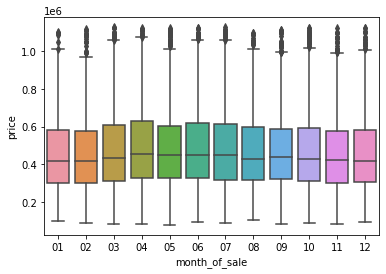

In [ ]:
sns.boxplot(x="month_of_sale", y="price", data=df2,
            order=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

Pelo boxplot, não dá para ver uma grande variedade de preço entre os meses.

In [ ]:
df2.groupby(['month_of_sale']).mean().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
month_of_sale,,,,,,,,,,,,,
01,458157.89,3.36,2.06,1971.02,16447.29,1.46,1716.36,254.66,1971.11,66.90,1903.73,12148.13,0.03
02,456272.47,3.31,2.01,1930.42,13540.14,1.45,1662.46,267.96,1971.15,46.86,1892.42,11499.50,0.02
03,479756.79,3.32,2.00,1928.82,14710.77,1.45,1672.52,256.30,1970.60,73.15,1888.74,12369.29,0.04
04,496980.89,3.33,2.04,1954.09,13223.69,1.48,1692.05,262.04,1971.29,62.71,1919.46,11756.59,0.03
05,481255.16,3.31,2.04,1970.04,16417.19,1.47,1692.65,277.39,1970.07,90.41,1917.39,13487.56,0.05
06,490464.63,3.36,2.10,2021.96,13908.99,1.49,1740.21,281.75,1970.85,67.99,1965.07,12470.90,0.03
07,483486.71,3.36,2.08,2020.98,13448.98,1.50,1760.79,260.20,1971.71,80.28,1960.31,12406.39,0.04
08,476590.56,3.31,2.06,1984.68,14158.03,1.48,1720.47,264.22,1971.56,70.26,1928.93,12635.32,0.04
09,474068.87,3.33,2.08,1987.28,15363.77,1.47,1718.12,269.17,1970.64,89.62,1933.87,11789.51,0.04


In [ ]:
month_of_sale_price = df2.groupby(['month_of_sale']).mean().round(2).iloc[:,:1]
month_of_sale_price

,price
month_of_sale,
01,458157.89
02,456272.47
03,479756.79
04,496980.89
05,481255.16
06,490464.63
07,483486.71
08,476590.56
09,474068.87


In [ ]:
month_of_sale_price['incremento_%'] = [0,
                            (month_of_sale_price.price[1] / month_of_sale_price.price[0]).round(2)*100-100,
                            (month_of_sale_price.price[2] / month_of_sale_price.price[1]).round(2)*100-100,
                            (month_of_sale_price.price[3] / month_of_sale_price.price[2]).round(2)*100-100,
                            (month_of_sale_price.price[4] / month_of_sale_price.price[3]).round(2)*100-100,
                            (month_of_sale_price.price[5] / month_of_sale_price.price[4]).round(2)*100-100,
                            (month_of_sale_price.price[6] / month_of_sale_price.price[5]).round(2)*100-100,
                            (month_of_sale_price.price[7] / month_of_sale_price.price[6]).round(2)*100-100,
                            (month_of_sale_price.price[8] / month_of_sale_price.price[7]).round(2)*100-100,
                            (month_of_sale_price.price[9] / month_of_sale_price.price[8]).round(2)*100-100,
                            (month_of_sale_price.price[10] / month_of_sale_price.price[9]).round(2)*100-100,
                            (month_of_sale_price.price[11] / month_of_sale_price.price[10]).round(2)*100-100                                                          
                   ]

month_of_sale_price

,price,incremento_%
month_of_sale,,
01,458157.89,0.0
02,456272.47,0.0
03,479756.79,5.0
04,496980.89,4.0
05,481255.16,-3.0
06,490464.63,2.0
07,483486.71,-1.0
08,476590.56,-1.0
09,474068.87,-1.0


Conforme tabela acima, não há um grande acréscimo percentual entre um mês e o seguinte. Porém, é perceptível a diferença entre alguns meses. Por exemplo, o ‘price’ médio de abril (496.980.89) é 8% maior do que o de fevereiro (456.272.47). 

Esta diferença pode ser vista no gráfico abaixo.

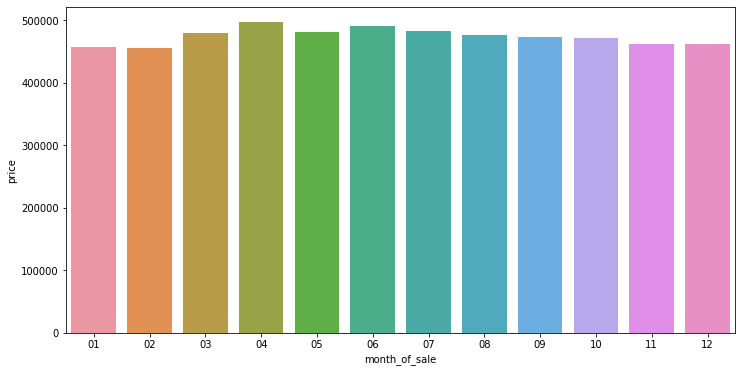

In [ ]:
barplot(month_of_sale_price, 'price', month_of_sale_price.index)

Sendo assim, creio que essa diferença pode ser melhor observada se dividirmos os meses pelas estações do ano (próximo tópico).

###Checando a estação do ano

In [ ]:
condicoes = [  
  (df2['month_of_sale'] == '01') | (df2['month_of_sale'] == '02') | (df2['month_of_sale'] == '12'),
  (df2['month_of_sale'] == '03') | (df2['month_of_sale'] == '04') | (df2['month_of_sale'] == '05'),
  (df2['month_of_sale'] == '06') | (df2['month_of_sale'] == '07') | (df2['month_of_sale'] == '08'),
  (df2['month_of_sale'] == '09') | (df2['month_of_sale'] == '10') | (df2['month_of_sale'] == '11')
    ]

valores = ['Inverno', 'Primavera', 'Verão', 'Outono']

df2["season_of_sale"] = np.select(condicoes, valores) 

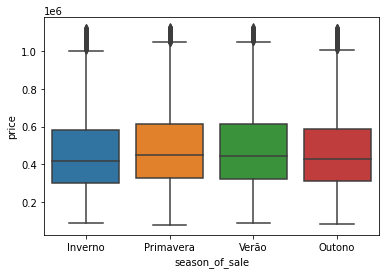

In [ ]:
sns.boxplot(x="season_of_sale", y="price", data=df2, 
            order=['Inverno', 'Primavera', 'Verão', 'Outono'])

In [ ]:
season_of_sale_price = df2.groupby(['season_of_sale']).mean().round(2).iloc[:,:1]
season_of_sale_price

,price
season_of_sale,
Inverno,459378.65
Outono,470098.26
Primavera,486197.36
Verão,483754.26


Conforme tabela acima, o inverno é a pior época do ano para vender um imóvel e a primeira é a melhor, tendo uma diferença de 6% entre os valores médios do ‘price’.

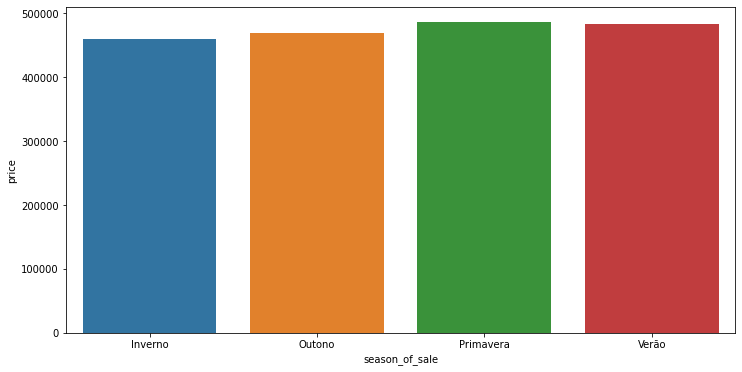

In [ ]:
barplot(season_of_sale_price, 'price', season_of_sale_price.index)

###Checando o dia

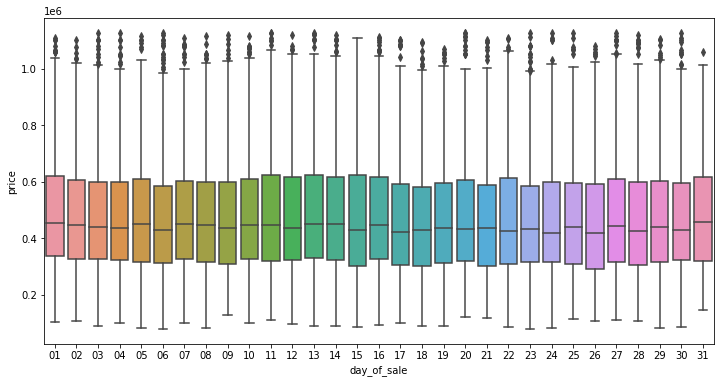

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="day_of_sale", y="price", data=df2,
            order=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
                   '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                   '31'])

In [ ]:
day_of_sale_price = df2.groupby(['day_of_sale']).mean().round(2).iloc[:,:1]
day_of_sale_price

,price
day_of_sale,
01,494937.16
02,478796.22
03,481618.19
04,473732.30
05,482388.05
06,467930.07
07,483709.20
08,479584.29
09,474201.11


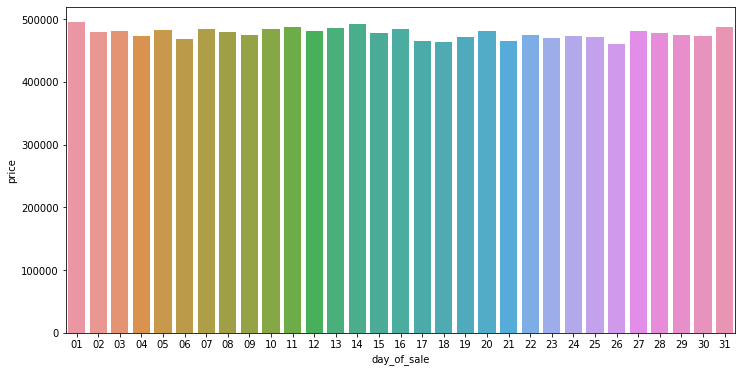

In [ ]:
barplot(day_of_sale_price, 'price', x=day_of_sale_price.index)

Pelas informações acima, não me parece ter um padrão que mostre alguma influência do dia na média da variável ‘price’.

#Variável Zip Code

O Zip Code é o código postal americano, que corresponde ao CEP no Brasil.

Ao fazermos o agrupamento médio por Zip Code, encontramos a tabela abaixo. 

In [ ]:
df2.groupby(['zipcode']).mean().round(2).sort_values(by=['price'], ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,renovated
zipcode,,,,,,,,,,,,,
98039,900833.33,3.17,1.42,1528.33,10149.83,1.00,1253.33,275.00,1957.50,0.00,2145.00,10255.17,0.00
98040,843129.49,3.78,2.28,2472.34,12348.64,1.30,1998.91,473.43,1965.21,157.05,2628.97,11606.84,0.08
98004,836017.24,3.43,1.93,1991.04,10783.73,1.27,1629.22,361.82,1961.57,103.82,2291.17,10603.55,0.05
98005,746697.38,3.82,2.35,2517.91,17658.86,1.24,2011.05,506.86,1968.19,39.18,2470.92,17059.86,0.02
98112,735698.78,3.19,1.97,1905.65,3799.56,1.71,1527.18,378.47,1944.82,235.21,1867.69,3930.51,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98023,283007.37,3.42,2.06,1979.48,10337.99,1.32,1694.38,285.10,1978.86,24.05,1959.62,9607.59,0.01
98001,281194.87,3.39,2.01,1903.78,14967.00,1.43,1723.76,180.03,1980.87,43.92,1830.10,11218.88,0.02
98032,251296.24,3.39,1.71,1738.05,10379.76,1.22,1434.32,303.73,1965.46,31.98,1668.63,9271.93,0.02


In [ ]:
#Checar os 10 com o 'price' médio mais caros
df2.groupby(['zipcode']).mean().round(2).sort_values(by=['price'], ascending=False).iloc[:10,:1]

,price
zipcode,
98039,900833.33
98040,843129.49
98004,836017.24
98005,746697.38
98112,735698.78
98075,729983.54
98119,697784.45
98109,696052.03
98102,695899.98


Conforme o código acima, são estes os 10 Zip Codes com os preços médios de imóveis mais caros:

* 1 (Zip Code 98039) - Cidade: Medina. 
* 2 (Zip Code 98040) - Cidade: Mercer Island.
* 3 (Zip Code 98004) - Cidade: Bellevue. 
* 4 (Zip Code 98005) - Cidade: Bellevue.
* 5 (Zip Code 98112) - Cidade: Seattle.
* 6 (Zip Code 98075) - Cidade: Sammamish.
* 7 (Zip Code 98119) - Cidade: Seattle.
* 8 (Zip Code 98109) - Cidade: Seattle.
* 9 (Zip Code 98102) - Cidade: Seattle.
* 10 (Zip Code 98006) - Cidade: Bellevue.

Informações importantes:

- Como já citado no início deste notebook, o Condado de King fica no estado de Washington e possui mais de 2,2 milhões de habitantes. A sede e cidade mais populosa do condado é a famosa Seattle (18ª mais populosa do país). 

- Conforme matéria da BBC (https://tinyurl.com/3ykev63c) “a cidade de Medina possui o sétimo código postal mais rico de todo o país e ali vivem duas das pessoas mais ricas do mundo: Bill Gates e Jeff Bezos. (...) A cidade é tranquila, mas está nas proximidades da agitação de Seattle, a maior cidade do Estado. Vivem ali cerca de 3 mil pessoas, com uma renda per capita que se aproxima dos US $ 190 mil ao ano”.

- A cidade de Mercer Island está localizada na Área Metropolitana de Seattle e em 2006 tinha uma população estimada de 23.463 habitantes (fonte: Wikipedia).

- Segundo o Wikipedia, “Bellevue é uma cidade que já foi considerada um subúrbio ou cidade-satélite de Seattle, sendo atualmente categorizada como uma boomburb (neologismo para uma cidade com grande e rápido crescimento, que permanece essencialmente com características suburbanas mesmo quando alcança populações típicas das cidades de centros urbanos). O centro da cidade passa por rápida mudança: é atualmente o segundo maior centro do estado de Washington, com mais de 35 mil trabalhadores e cinco mil residentes.”

- A cidade de Sammamish está localizada na Área Metropolitana de Seattle e em 2006 tinha uma população estimada de 35.164 habitantes (fonte: Wikipedia).

Abaixo um mapa com os Zip Codes de King County e destacados em amarelo estão os que possuem o ‘price’ médio mais caro.

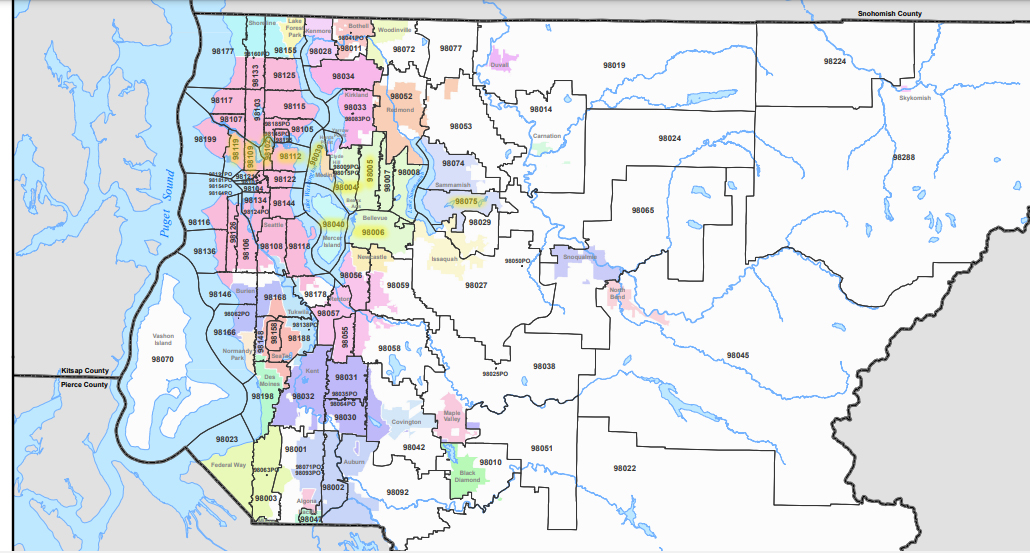

Como observado, as regiões mais caras ficam próximas umas das outras, quase todas dentro de uma mesma faixa.

#Escolha dos Imóveis

Chegou a hora de encontrar os imóveis que irei indicar para o CEO da House Rocket comprar. Irei separar 10 opções.

Após todas as análises acima, decidi fazer as escolhas se baseando principalmente nas variáveis ‘sqft_living’ (metragem quadrada do espaço interior), ‘sqft_lot’ (metragem quadrada do espaço terrestre), ‘bathrooms' (banheiros), 'bedrooms' (quartos), "renovated" (reformada) e 'condition' (condição do imóvel).

**Critérios**

- ‘sqft_living’, ‘sqft_lot’ e "renovated"

‘Sqft_living’ é a variável com maior correlação com ‘price’ e isto pôde ser visto claramente também quando separei em grupos de 1000 em 1000. Optei por escolher imóveis que tenham no máximo 2000 de ‘sqft_living’ (por serem mais baratos), que possuam uma grande ‘sqft_lot’ e que ainda não tiveram nenhuma reforma. Ou seja, imóveis que possuam uma metragem de espaço interior pequena, mas que estão em grandes lotes, de forma que seja possível fazer uma reforma. Afinal, a variável "renovated" mostrou que imóveis que tiveram reforma são mais valorizados.   

Observação importante: pode ser que na vida real a casa tenha alguma questão estrutural ou mesmo alguma situação específica no terreno que impeça uma reforma. Sendo assim, farei aqui uma suposição que todos os imóveis escolhidos tenham condições de serem reformados.

- ‘bathrooms'

Vou escolher imóveis que tenham no máximo 2 banheiros e a ideia é construir pelo menos 1 banheiro a mais. Os dados mostraram que uma casa com 2 banheiros completos é 29% mais cara que uma casa com 1 banheiro completo, e uma casa com 3 banheiros completos é 32% mais cara que uma que possui 2 banheiros completos.

- 'bedrooms' 

O raciocínio é o mesmo do banheiro, vou escolher imóveis que tenham no máximo 2 quartos e a ideia é construir um a mais. Os dados mostraram que uma casa com 2 quartos é 25% mais cara que uma casa com 1 quarto, e uma casa com 3 quartos é 12% mais cara que uma casa com 2 quartos.

- 'condition'

Relembrando, a coluna ‘Condition’ é um índice de 1 a 5 sobre a condição do imóvel: Ruim, Razoável, Médio, Bom e Muito Bom. Não vou escolher nenhum imóvel com índice 1 porque, teoricamente, por ter uma condição ruim, teria que ser gasto muito dinheiro na reforma. Sendo assim, decidi escolher apenas imóveis com o nível 2 e, através da reforma, transformá-lo em nível 3. Pelos dados, vimos que os imóveis do nível 3 são 55% mais caros do que os do nível 2.

In [ ]:
filtro = (df2['sqft_living']<=2000) & (df2['bathrooms']<=2) & (df2['bedrooms']<=2) & (df2['condition']==2)
opcoes_imoveis = df2[filtro]
opcoes_imoveis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale,sqft_living_cat,yr_built_cat,renovated,season_of_sale
242,1868901275,20150127T000000,455000.0,2,1.00,1430,5000,1.5,0,0,2,2,...,98115,47.6727,-122.299,1450,3750,2015,01,27,1001-2000,1920-1929,0,Inverno
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,2,2,...,98014,47.6499,-121.909,1200,7500,2014,05,23,0-1000,1910-1919,0,Primavera
1026,1498302774,20140520T000000,271310.0,2,1.00,870,5340,1.5,0,0,2,2,...,98144,47.5849,-122.302,1190,4440,2014,05,20,0-1000,1900-1909,0,Primavera
1325,4337000160,20150127T000000,110000.0,2,1.00,830,7590,1.0,0,0,2,2,...,98166,47.4784,-122.335,980,7590,2015,01,27,0-1000,1940-1949,0,Inverno
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,2,2,...,98168,47.4799,-122.296,1572,10570,2014,05,08,0-1000,1950-1959,0,Primavera
2352,7229700105,20150424T000000,172500.0,2,2.00,1510,20685,1.0,0,0,2,2,...,98059,47.4810,-122.116,1490,29527,2015,04,24,1001-2000,1950-1959,0,Primavera
3213,2028700265,20150115T000000,505000.0,2,1.75,1310,3816,1.0,0,0,2,2,...,98117,47.6790,-122.368,1510,3816,2015,01,15,1001-2000,1920-1929,0,Inverno
3361,7135300026,20141224T000000,160000.0,2,2.00,1040,4750,1.0,0,0,2,2,...,98118,47.5293,-122.272,1350,5000,2014,12,24,1001-2000,1950-1959,0,Inverno
3717,3422059085,20150324T000000,157340.0,2,1.00,900,23000,1.0,0,0,2,2,...,98042,47.3576,-122.156,1460,8265,2015,03,24,0-1000,1950-1959,0,Primavera
4053,6844702290,20140527T000000,400000.0,2,1.00,1470,6120,1.0,0,0,2,2,...,98115,47.6914,-122.287,1840,6120,2014,05,27,1001-2000,1940-1949,0,Primavera


Ao filtrar com os critérios que escolhi, foram encontrados 59 imóveis. Para facilitar a análise, vou visualizar algumas colunas do dataframe.   

In [ ]:
opcoes_imoveis[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'year_of_sale', 'month_of_sale',
       'sqft_living_cat', 'yr_built_cat', 'season_of_sale']]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,sqft_living_cat,yr_built_cat,season_of_sale
242,1868901275,455000.0,2,1.00,1430,5000,1.5,2,1925,98115,1450,3750,2015,01,1001-2000,1920-1929,Inverno
465,8658300340,80000.0,1,0.75,430,5050,1.0,2,1912,98014,1200,7500,2014,05,0-1000,1910-1919,Primavera
1026,1498302774,271310.0,2,1.00,870,5340,1.5,2,1906,98144,1190,4440,2014,05,0-1000,1900-1909,Primavera
1325,4337000160,110000.0,2,1.00,830,7590,1.0,2,1943,98166,980,7590,2015,01,0-1000,1940-1949,Inverno
2141,1623049041,82500.0,2,1.00,520,22334,1.0,2,1951,98168,1572,10570,2014,05,0-1000,1950-1959,Primavera
2352,7229700105,172500.0,2,2.00,1510,20685,1.0,2,1958,98059,1490,29527,2015,04,1001-2000,1950-1959,Primavera
3213,2028700265,505000.0,2,1.75,1310,3816,1.0,2,1929,98117,1510,3816,2015,01,1001-2000,1920-1929,Inverno
3361,7135300026,160000.0,2,2.00,1040,4750,1.0,2,1950,98118,1350,5000,2014,12,1001-2000,1950-1959,Inverno
3717,3422059085,157340.0,2,1.00,900,23000,1.0,2,1953,98042,1460,8265,2015,03,0-1000,1950-1959,Primavera
4053,6844702290,400000.0,2,1.00,1470,6120,1.0,2,1940,98115,1840,6120,2014,05,1001-2000,1940-1949,Primavera


Achei importante verificar quais são os 10 Zip Codes menos valorizados, para não escolher imóveis que estejam nestas áreas. 

In [ ]:
#Filtrando os 10 Zip Codes menos valorizados
df2.groupby(['zipcode']).mean().round(2).sort_values(by=['price']).iloc[:10,:1]

,price
zipcode,
98002,234284.04
98168,240328.37
98032,251296.24
98001,281194.87
98023,283007.37
98148,284908.60
98188,289078.35
98003,294111.28
98198,295795.28


No mapa abaixo pode-se observar os 10 Zip Codes mais valorizados (destacados em amarelo) e os 10 menos valorizados (destacados em vermelho).

Os Zip Codes menos valorizados estão concentrados na região sul/sudoeste de King County e são das cidades: Auburn, Tukwila, Kent, Lakeland North, Federal Way, Burien, SeaTac e Des Moines. A maioria delas faz parte da região metropolitana de Seattle. 

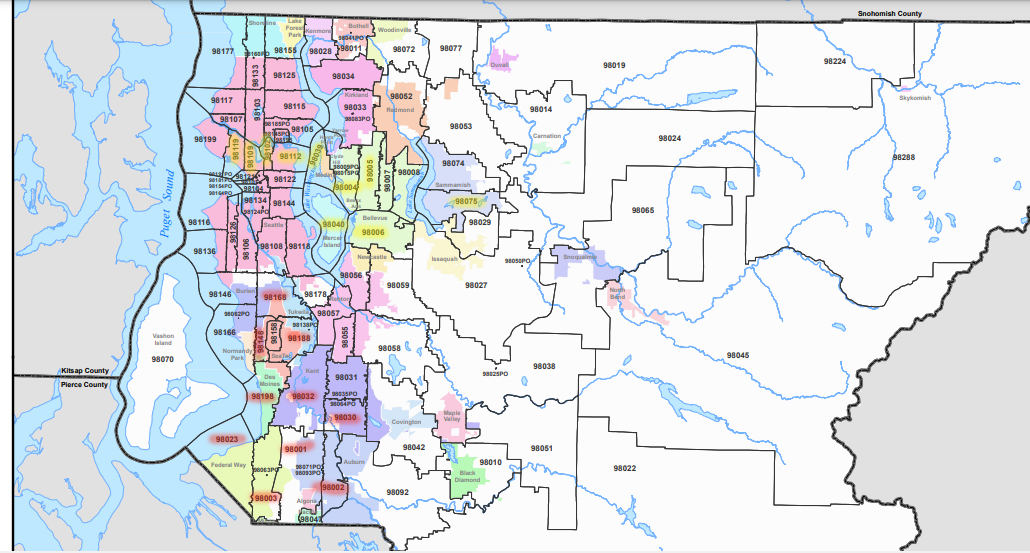

In [ ]:
#Configurando para conseguir ver as 70 linhas
pd.set_option("display.max_rows", 70)

Agora vou dar uma olhada em todos os Zip Codes e checar o valor médio de ‘price’ de cada um. 

In [ ]:
all_zipcodes = df2.groupby(['zipcode']).mean().round(2).sort_values(by=['price'], ascending=False).iloc[:,:1]
all_zipcodes

,price
zipcode,
98039,900833.33
98040,843129.49
98004,836017.24
98005,746697.38
98112,735698.78
98075,729983.54
98119,697784.45
98109,696052.03
98102,695899.98


In [ ]:
#Cria um novo index e faz com que 'zipcode' vire uma coluna
all_zipcodes = all_zipcodes.reset_index()
all_zipcodes

,zipcode,price
0,98039,900833.33
1,98040,843129.49
2,98004,836017.24
3,98005,746697.38
4,98112,735698.78
5,98075,729983.54
6,98119,697784.45
7,98109,696052.03
8,98102,695899.98
9,98006,695769.60


In [ ]:
#Faz que o index inicie com 1
all_zipcodes.index = np.arange(1, len(all_zipcodes) + 1)
all_zipcodes

,zipcode,price
1,98039,900833.33
2,98040,843129.49
3,98004,836017.24
4,98005,746697.38
5,98112,735698.78
6,98075,729983.54
7,98119,697784.45
8,98109,696052.03
9,98102,695899.98
10,98006,695769.60


Ao separar uma primeira lista de imóveis, reparei que não havia nenhum que o Zip Code fosse de Seattle. Por ser a cidade mais importante da região, acho importante escolher também alguns imóveis lá.

Para encontrar imóveis em Seattle, será preciso alterar um pouco o meu filtro. Vou colocar ‘condition’ como 3 e incluir uma filtragem nos Zip Codes da cidade.

In [ ]:
#Alterei o Zip Code para inteiro para facilitar a busca.
df2['zipcode'] = df2['zipcode'].astype('int64') 

In [ ]:
#Para achar Seattle coloquei condition 3 e filtrei os zipcodes
filtro_2 = (df2['sqft_living']<=2000) & (df2['bathrooms']<=2) & (df2['bedrooms']<=2) & (df2['condition']==3) & ((df2['zipcode']>=98101) & (df2['zipcode']<=98199))
opcoes_imoveis_2 = df2[filtro_2]
opcoes_imoveis_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale,sqft_living_cat,yr_built_cat,renovated,season_of_sale
31,2426039314,20141201T000000,280000.0,2,1.50,1190,1265,3.0,0,0,3,2,...,98133,47.7274,-122.357,1390,1756,2014,12,01,1001-2000,2000-2015,0,Inverno
53,3626039271,20150205T000000,585000.0,2,1.75,1980,8550,1.0,0,0,3,2,...,98117,47.6989,-122.369,1480,6738,2015,02,05,1001-2000,1980-1989,0,Inverno
89,3869900162,20140904T000000,335000.0,2,1.75,1030,1066,2.0,0,0,3,2,...,98136,47.5394,-122.387,1030,1106,2014,09,04,1001-2000,2000-2015,0,Outono
122,3626039187,20150406T000000,395000.0,2,1.00,770,6000,1.0,0,0,3,2,...,98117,47.6999,-122.364,1710,6000,2015,04,06,0-1000,1950-1959,0,Primavera
138,3992700335,20140707T000000,382500.0,2,1.00,1190,4440,1.0,0,0,3,2,...,98125,47.7135,-122.287,1060,5715,2014,07,07,1001-2000,1980-1989,0,Verão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,476000017,20141003T000000,553000.0,2,2.00,1400,1512,2.0,0,0,3,2,...,98107,47.6719,-122.392,1400,3500,2014,10,03,1001-2000,2000-2015,0,Outono
21578,567000385,20140623T000000,362500.0,2,1.50,940,1768,2.0,0,0,3,2,...,98144,47.5925,-122.295,1130,1159,2014,06,23,0-1000,2000-2015,0,Verão
21588,2767600688,20141113T000000,414500.0,2,1.50,1210,1278,2.0,0,0,3,2,...,98117,47.6756,-122.375,1210,1118,2014,11,13,1001-2000,2000-2015,0,Outono
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,2,...,98144,47.5944,-122.299,1020,2007,2014,06,23,1001-2000,2000-2015,0,Verão


Agora vou checar quais são os Zip Codes mais baratos deste segundo filtro.

In [ ]:
opcoes_imoveis_2.groupby(['zipcode']).mean().round(2).sort_values(by=['price']).iloc[:11,:1]

,price
zipcode,
98198,185198.61
98188,191315.00
98148,193066.67
98168,198868.18
98146,213801.35
98178,244707.13
98106,259643.10
98108,269250.54
98166,275803.17


Sabendo quais são os Zip Codes mais baratos de Seattle, farei uma nova filtragem, desta vez com Zip Codes específicos.

In [ ]:
filtro_seattle = (df2['sqft_living']<=2000) & (df2['bathrooms']<=2) & (df2['bedrooms']<=2) & (df2['condition']==3) & ((df2['zipcode']==98106) | (df2['zipcode']==98108) | (df2['zipcode']==98126))
opcoes_imoveis_seattle = df2[filtro_seattle]
opcoes_imoveis_seattle

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale,sqft_living_cat,yr_built_cat,renovated,season_of_sale
241,8150100045,20141001T000000,210000.0,2,1.00,830,6000,1.0,0,0,3,2,...,98126,47.5308,-122.376,830,4960,2014,10,01,0-1000,1940-1949,0,Outono
247,7899800890,20150226T000000,181000.0,2,1.50,720,5120,1.0,0,0,3,2,...,98106,47.5218,-122.357,1150,2566,2015,02,26,0-1000,1950-1959,0,Inverno
478,66000070,20150406T000000,315000.0,2,1.00,630,6550,1.0,0,0,3,2,...,98126,47.5486,-122.380,1420,6550,2015,04,06,0-1000,1910-1919,0,Primavera
524,7453000070,20140818T000000,275000.0,2,1.00,940,5000,1.0,0,0,3,2,...,98126,47.5186,-122.374,940,5000,2014,08,18,0-1000,1950-1959,0,Verão
547,7899800860,20150319T000000,259950.0,2,2.00,1070,649,2.0,0,0,3,2,...,98106,47.5213,-122.357,1070,928,2015,03,19,1001-2000,2000-2015,0,Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21151,3438500346,20140702T000000,265050.0,2,1.50,800,2119,2.0,0,0,3,2,...,98106,47.5540,-122.362,1020,4800,2014,07,02,0-1000,2000-2015,0,Verão
21226,3278600680,20140627T000000,235000.0,1,1.50,1170,1456,2.0,0,0,3,2,...,98126,47.5493,-122.372,1360,1730,2014,06,27,1001-2000,2000-2015,0,Verão
21279,6056110780,20140627T000000,229800.0,2,1.75,1110,1773,2.0,0,0,3,2,...,98108,47.5647,-122.293,1420,2855,2014,06,27,1001-2000,2000-2015,0,Verão
21443,3278600750,20150407T000000,250000.0,1,1.50,1180,1688,2.0,0,0,3,2,...,98126,47.5490,-122.372,1380,2059,2015,04,07,1001-2000,2000-2015,0,Primavera


Vou conferir agora quais são os mais baratos.

In [ ]:
opcoes_imoveis_seattle.sort_values(by=['price']).iloc[:11,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale,sqft_living_cat,yr_built_cat,renovated,season_of_sale
16530,2114700500,20150418T000000,90000.0,1,1.00,560,4120,1.0,0,0,3,2,...,98106,47.5335,-122.348,980,4120,2015,04,18,0-1000,1940-1949,0,Primavera
7992,2734100835,20150303T000000,90000.0,1,1.00,780,4000,1.0,0,0,3,2,...,98108,47.5424,-122.321,1150,4000,2015,03,03,0-1000,1900-1909,0,Primavera
13761,123039604,20140701T000000,102500.0,2,1.00,820,4320,1.0,0,0,3,2,...,98106,47.5140,-122.359,780,7424,2014,07,01,0-1000,1930-1939,0,Verão
13413,7454000145,20150306T000000,122000.0,2,1.00,740,6840,1.0,0,0,3,2,...,98126,47.5168,-122.373,740,6840,2015,03,06,0-1000,1940-1949,0,Primavera
12417,123039336,20140611T000000,148000.0,1,1.00,620,8261,1.0,0,0,3,2,...,98106,47.5138,-122.364,1180,8244,2014,06,11,0-1000,1930-1939,0,Verão
19098,2114700615,20140708T000000,148000.0,2,1.00,630,4200,1.0,0,0,3,2,...,98106,47.5329,-122.348,970,4200,2014,07,08,0-1000,1930-1939,0,Verão
8890,2113701095,20140717T000000,150000.0,2,1.00,830,4045,1.0,0,0,3,2,...,98106,47.5293,-122.351,1100,4116,2014,07,17,0-1000,1940-1949,0,Verão
19344,2114700090,20150301T000000,151000.0,2,0.75,720,5040,1.0,0,0,3,2,...,98106,47.5323,-122.347,1290,4120,2015,03,01,0-1000,1940-1949,0,Primavera
3984,7883607645,20140602T000000,155000.0,1,1.00,720,6000,1.0,0,0,3,2,...,98108,47.5266,-122.316,1040,6000,2014,06,02,0-1000,1940-1949,0,Verão
2813,7883600700,20150122T000000,157500.0,2,1.00,670,4500,1.0,0,0,3,2,...,98108,47.5271,-122.326,1210,4500,2015,01,22,0-1000,1900-1909,0,Inverno


#Resultado

Após todas as análises anteriores, resolvi selecionar os 10 imóveis abaixo.

In [ ]:
imoveis_escolhidos = (df2['id']==4337000160) | (df2['id']==7229700105) | (df2['id']==1900000195) | (df2['id']==722039087) | (df2['id']==203101370) | (df2['id']==6817800330) | (df2['id']==3024089049) | (df2['id']==3624079067) | (df2['id']==123039336) | (df2['id']==7883607645)
imoveis = df2[imoveis_escolhidos]
imoveis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale,sqft_living_cat,yr_built_cat,renovated,season_of_sale
1325,4337000160,20150127T000000,110000.0,2,1.00,830,7590,1.0,0,0,2,2,...,98166,47.4784,-122.335,980,7590,2015,01,27,0-1000,1940-1949,0,Inverno
2352,7229700105,20150424T000000,172500.0,2,2.00,1510,20685,1.0,0,0,2,2,...,98059,47.4810,-122.116,1490,29527,2015,04,24,1001-2000,1950-1959,0,Primavera
3984,7883607645,20140602T000000,155000.0,1,1.00,720,6000,1.0,0,0,3,2,...,98108,47.5266,-122.316,1040,6000,2014,06,02,0-1000,1940-1949,0,Verão
4563,1900000195,20140630T000000,100000.0,2,1.00,930,7623,1.0,0,0,2,2,...,98166,47.4670,-122.349,1300,7641,2014,06,30,0-1000,1940-1949,0,Verão
9275,722039087,20140923T000000,220500.0,2,1.00,990,57499,1.0,0,0,2,2,...,98070,47.4145,-122.463,2090,27442,2014,09,23,0-1000,1940-1949,0,Outono
9276,722039087,20150504T000000,329000.0,2,1.00,990,57499,1.0,0,0,2,2,...,98070,47.4145,-122.463,2090,27442,2015,05,04,0-1000,1940-1949,0,Primavera
11796,203101370,20140630T000000,170000.0,2,1.00,1200,24792,2.0,0,0,2,2,...,98053,47.6337,-121.961,2150,24792,2014,06,30,1001-2000,1970-1979,0,Verão
12417,123039336,20140611T000000,148000.0,1,1.00,620,8261,1.0,0,0,3,2,...,98106,47.5138,-122.364,1180,8244,2014,06,11,0-1000,1930-1939,0,Verão
12418,123039336,20141208T000000,244900.0,1,1.00,620,8261,1.0,0,0,3,2,...,98106,47.5138,-122.364,1180,8244,2014,12,08,0-1000,1930-1939,0,Inverno
14103,6817800330,20140812T000000,405000.0,2,1.00,1090,10481,1.0,0,0,2,2,...,98074,47.6320,-122.030,1160,10533,2014,08,12,1001-2000,1980-1989,0,Verão


Dois IDs vieram repetidos, então vou excluir os que não vão entrar na lista final.

In [ ]:
imoveis.drop([9276, 12418],axis='index', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Lista final com os 10 imóveis escolhidos:

In [ ]:
imoveis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_of_sale,month_of_sale,day_of_sale,sqft_living_cat,yr_built_cat,renovated,season_of_sale
1325,4337000160,20150127T000000,110000.0,2,1.00,830,7590,1.0,0,0,2,2,...,98166,47.4784,-122.335,980,7590,2015,01,27,0-1000,1940-1949,0,Inverno
2352,7229700105,20150424T000000,172500.0,2,2.00,1510,20685,1.0,0,0,2,2,...,98059,47.4810,-122.116,1490,29527,2015,04,24,1001-2000,1950-1959,0,Primavera
3984,7883607645,20140602T000000,155000.0,1,1.00,720,6000,1.0,0,0,3,2,...,98108,47.5266,-122.316,1040,6000,2014,06,02,0-1000,1940-1949,0,Verão
4563,1900000195,20140630T000000,100000.0,2,1.00,930,7623,1.0,0,0,2,2,...,98166,47.4670,-122.349,1300,7641,2014,06,30,0-1000,1940-1949,0,Verão
9275,722039087,20140923T000000,220500.0,2,1.00,990,57499,1.0,0,0,2,2,...,98070,47.4145,-122.463,2090,27442,2014,09,23,0-1000,1940-1949,0,Outono
11796,203101370,20140630T000000,170000.0,2,1.00,1200,24792,2.0,0,0,2,2,...,98053,47.6337,-121.961,2150,24792,2014,06,30,1001-2000,1970-1979,0,Verão
12417,123039336,20140611T000000,148000.0,1,1.00,620,8261,1.0,0,0,3,2,...,98106,47.5138,-122.364,1180,8244,2014,06,11,0-1000,1930-1939,0,Verão
14103,6817800330,20140812T000000,405000.0,2,1.00,1090,10481,1.0,0,0,2,2,...,98074,47.6320,-122.030,1160,10533,2014,08,12,1001-2000,1980-1989,0,Verão
17232,3024089049,20140609T000000,280000.0,2,1.75,1610,158558,1.5,0,0,2,2,...,98065,47.5319,-121.840,1800,3572,2014,06,09,1001-2000,1940-1949,0,Verão
18842,3624079067,20140508T000000,330000.0,2,2.00,1550,435600,1.5,0,0,2,2,...,98065,47.5145,-121.853,1600,217800,2014,05,08,1001-2000,1970-1979,0,Primavera


Agora vou incluir algumas informações e organizar melhor esta tabela. Primeiramente, vou criar um novo dataframe somente com as colunas que entraram nos critérios escolhidos.

In [ ]:
lista_final = imoveis[['id', 'price', 'bedrooms', 'bathrooms', 'condition', 'zipcode', 'sqft_living',
       'sqft_lot']]
lista_final

,id,price,bedrooms,bathrooms,condition,zipcode,sqft_living,sqft_lot
1325,4337000160,110000.0,2,1.00,2,98166,830,7590
2352,7229700105,172500.0,2,2.00,2,98059,1510,20685
3984,7883607645,155000.0,1,1.00,3,98108,720,6000
4563,1900000195,100000.0,2,1.00,2,98166,930,7623
9275,722039087,220500.0,2,1.00,2,98070,990,57499
11796,203101370,170000.0,2,1.00,2,98053,1200,24792
12417,123039336,148000.0,1,1.00,3,98106,620,8261
14103,6817800330,405000.0,2,1.00,2,98074,1090,10481
17232,3024089049,280000.0,2,1.75,2,98065,1610,158558
18842,3624079067,330000.0,2,2.00,2,98065,1550,435600


Em seguida, criarei uma coluna com o preço de compra que irei sugerir (será explicado melhor no próximo tópico).

In [ ]:
lista_final['preco_de_compra'] = [i*0.95 for i in lista_final.price]

<ipython-input-127-5783f9e7dece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_final['preco_de_compra'] = [i*0.95 for i in lista_final.price]


O próximo passo é criar a coluna com o preço de venda sugerido.

In [ ]:
lista_final['preco_de_venda'] = [195000, 320000, 270000, 186000, 400500, 320000, 255000, 570000, 440000, 500000]

<ipython-input-128-fdd6286a2c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_final['preco_de_venda'] = [195000, 320000, 270000, 186000, 400500, 320000, 255000, 570000, 440000, 500000]


Em seguida, criar a coluna com o incremento percentual.

In [ ]:
lista_final['incremento_preco_%'] = lista_final.preco_de_venda/lista_final.preco_de_compra*100-100

<ipython-input-129-d828a49ec25e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_final['incremento_preco_%'] = lista_final.preco_de_venda/lista_final.preco_de_compra*100-100


In [ ]:
#Arrendondar os números da coluna
lista_final['incremento_preco_%'] = lista_final['incremento_preco_%'].round(2)

<ipython-input-130-2e6852d9f6c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_final['incremento_preco_%'] = lista_final['incremento_preco_%'].round(2)


Agora vou criar as colunas que mostram a quantidade de banheiros pós reforma, de quartos pós reforma, do ‘condition’ pós reforma, o nome da cidade e o valor médio dos imóveis do zipcode.

In [ ]:
lista_final['banheiros_pos_ref'] = [1.5, 3, 1.5, 1.5, 2, 2, 1.5, 2, 3, 3]
lista_final['quartos_pos_ref'] = [3, 3, 2, 3, 3, 3, 2, 2, 3, 3]
lista_final['condition_pos_ref'] = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
lista_final['price_medio_zipcode'] = [428048.13, 465100.50, 355678.52, 428048.13, 474153.88, 630306.41,
                                      319581.39, 646871.51, 516405.85, 516405.85]
lista_final['cidade'] = ['Burien', 'Renton', 'Seattle', 'Burien', 'Vashon', 'Union Hill-Novelty Hill',
                         'Seattle', 'Sammamish', 'Snoqualmie', 'Snoqualmie']

<ipython-input-131-0d49511f61cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_final['banheiros_pos_ref'] = [1.5, 3, 1.5, 1.5, 2, 2, 1.5, 2, 3, 3]
<ipython-input-131-0d49511f61cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_final['quartos_pos_ref'] = [3, 3, 2, 3, 3, 3, 2, 2, 3, 3]
<ipython-input-131-0d49511f61cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Para facilitar a visualização e análise, vou reorganizar a ordem das colunas.

In [ ]:
lista_final = lista_final[['id', 'sqft_living', 'sqft_lot', 'price', 'preco_de_compra', 'preco_de_venda',
             'incremento_preco_%', 'bedrooms', 'quartos_pos_ref', 'bathrooms', 'banheiros_pos_ref',
             'condition', 'condition_pos_ref', 'zipcode', 'price_medio_zipcode', 'cidade']]

#Respostas e Explicações

O meu objetivo era responder estas perguntas:

- Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

- Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

- A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?”

Começando pela segunda questão, como mostrado no tópico “Checando a estação do ano”, **a primavera (março, abril e maio) é o melhor momento do ano para vender o imóvel**. Afinal, é o período com o ‘price’ médio mais caro.

Já o tópico “Yr_renovated (ano da última reforma da casa)” mostra que **sim, a House Rocket deveria fazer uma reforma em todas as casas**, já que, em média, um imóvel reformado custa 19% a mais do que aqueles sem reforma.

De um modo geral, minhas **sugestões de mudanças** são a construção de 1 quarto a mais e/ou de 0.5 ou 1 banheiro a mais. Por isso a escolha por lotes grandes, de forma que possibilite aumentar as casas. 

Junto à construção dos quartos e banheiros, serão feitas as reformas necessárias em cada casa, por isso a subida do nível do ‘condition’ de 2 para 3. As exceções são os imóveis de Seattle, que já possuem um ‘condition’ 3. Sendo assim, são locais que não precisam de grandes reformas e que vão continuar no mesmo nível.

Sobre a **sugestão do preço de compra**, como isto entra no campo da suposição, vou sugerir um desconto de 5% no preço de todos os imóveis, supondo que esta fosse a média que a House Rocket conseguiria negociar com os proprietários.

O **preço de venda** foi definido tendo em visto tudo o que foi posto e também o Zip Code do local. Escolhi um valor que ficasse abaixo do ‘price’ médio da região. 

Sendo assim, segue abaixo a tabela final com todas as informações:

In [ ]:
lista_final

,id,sqft_living,sqft_lot,price,preco_de_compra,preco_de_venda,incremento_preco_%,bedrooms,quartos_pos_ref,bathrooms,banheiros_pos_ref,condition,condition_pos_ref,zipcode,price_medio_zipcode,cidade
1325,4337000160,830,7590,110000.0,104500.0,195000,86.60,2,3,1.00,1.5,2,3,98166,428048.13,Burien
2352,7229700105,1510,20685,172500.0,163875.0,320000,95.27,2,3,2.00,3.0,2,3,98059,465100.50,Renton
3984,7883607645,720,6000,155000.0,147250.0,270000,83.36,1,2,1.00,1.5,3,3,98108,355678.52,Seattle
4563,1900000195,930,7623,100000.0,95000.0,186000,95.79,2,3,1.00,1.5,2,3,98166,428048.13,Burien
9275,722039087,990,57499,220500.0,209475.0,400500,91.19,2,3,1.00,2.0,2,3,98070,474153.88,Vashon
11796,203101370,1200,24792,170000.0,161500.0,320000,98.14,2,3,1.00,2.0,2,3,98053,630306.41,Union Hill-Novelty Hill
12417,123039336,620,8261,148000.0,140600.0,255000,81.37,1,2,1.00,1.5,3,3,98106,319581.39,Seattle
14103,6817800330,1090,10481,405000.0,384750.0,570000,48.15,2,2,1.00,2.0,2,3,98074,646871.51,Sammamish
17232,3024089049,1610,158558,280000.0,266000.0,440000,65.41,2,3,1.75,3.0,2,3,98065,516405.85,Snoqualmie
18842,3624079067,1550,435600,330000.0,313500.0,500000,59.49,2,3,2.00,3.0,2,3,98065,516405.85,Snoqualmie


No mapa abaixo pode-se observar os 10 Zip Codes mais valorizados (destacados em amarelo), os 10 menos valorizados (destacados em vermelho) e os Zip Codes das regiões dos imóveis sugeridos (destacados em azul).

Os imóveis que indiquei ficam nas cidades de Burien, Renton, Seattle, Vashon, Union Hill-Novelty Hill, Sammamish, Snoqualmie e Snoqualmie. Como pode-se observar, abrangem várias regiões de King County, de forma que estão próximos das áreas mais caras, como também das mais baratas. Ou seja, há imóveis para todos os perfis.  

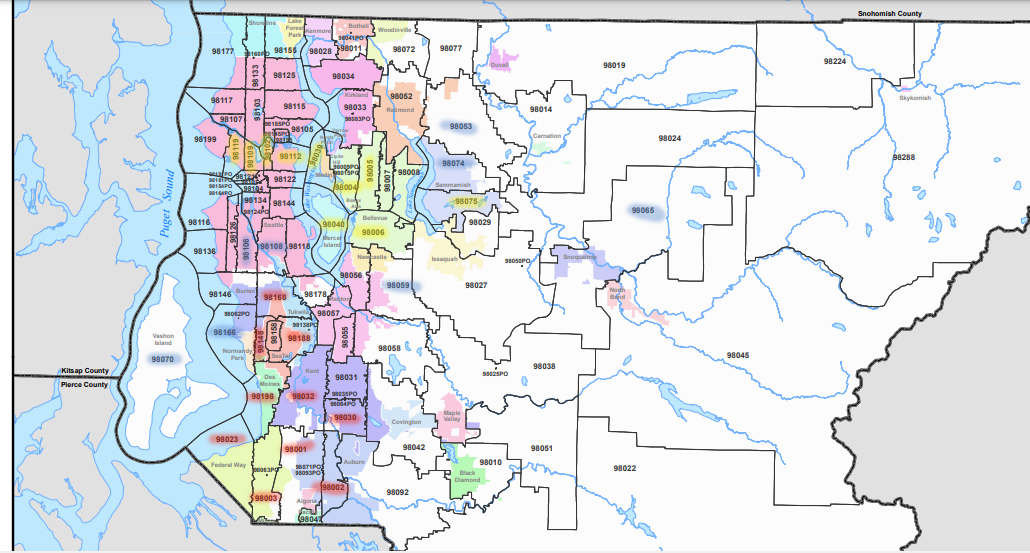